# Make IQU separation plots

In [2]:
from statistical_tools import *
%matplotlib inline
from astropy.convolution import convolve, Gaussian2DKernel

## Load data

In [ ]:
data_folder = ''

In [2]:
N_pix = 768
a = 64

file_100 = 'separation_IQU_B_100_5steps_50iters_Mn=100.npy'
file_143 = 'separation_IQU_B_143_5steps_50iters_Mn=100.npy'
file_217 = 'separation_IQU_B_217_5steps_50iters_Mn=100.npy'
file_353 = 'separation_IQU_B_353_5steps_50iters_Mn=100.npy'

separation_100 = np.load(data_folder+file_100)[:,a:-a,a:-a]
separation_143 = np.load(data_folder+file_143)[:,a:-a,a:-a]
separation_217 = np.load(data_folder+file_217)[:,a:-a,a:-a]
separation_353 = np.load(data_folder+file_353)[:,a:-a,a:-a]

d_Q_100_HM1 = np.load(data_folder+'Sroll20_Q_100_HM1_768px.npy')[a:-a,a:-a]
d_Q_100_HM2 = np.load(data_folder+'Sroll20_Q_100_HM2_768px.npy')[a:-a,a:-a]
d_Q_143_HM1 = np.load(data_folder+'Sroll20_Q_143_HM1_768px.npy')[a:-a,a:-a]
d_Q_143_HM2 = np.load(data_folder+'Sroll20_Q_143_HM2_768px.npy')[a:-a,a:-a]
d_Q_217_HM1 = np.load(data_folder+'Sroll20_Q_217_HM1_768px.npy')[a:-a,a:-a]
d_Q_217_HM2 = np.load(data_folder+'Sroll20_Q_217_HM2_768px.npy')[a:-a,a:-a]
d_Q_353_HM1 = np.load(data_folder+'Sroll20_Q_353_HM1_768px.npy')[a:-a,a:-a]
d_Q_353_HM2 = np.load(data_folder+'Sroll20_Q_353_HM2_768px.npy')[a:-a,a:-a]

d_U_100_HM1 = np.load(data_folder+'Sroll20_U_100_HM1_768px.npy')[a:-a,a:-a]
d_U_100_HM2 = np.load(data_folder+'Sroll20_U_100_HM2_768px.npy')[a:-a,a:-a]
d_U_143_HM1 = np.load(data_folder+'Sroll20_U_143_HM1_768px.npy')[a:-a,a:-a]
d_U_143_HM2 = np.load(data_folder+'Sroll20_U_143_HM2_768px.npy')[a:-a,a:-a]
d_U_217_HM1 = np.load(data_folder+'Sroll20_U_217_HM1_768px.npy')[a:-a,a:-a]
d_U_217_HM2 = np.load(data_folder+'Sroll20_U_217_HM2_768px.npy')[a:-a,a:-a]
d_U_353_HM1 = np.load(data_folder+'Sroll20_U_353_HM1_768px.npy')[a:-a,a:-a]
d_U_353_HM2 = np.load(data_folder+'Sroll20_U_353_HM2_768px.npy')[a:-a,a:-a]

In [ ]:
before_sep = np.zeros((2,4,N_pix-2*a,N_pix-2*a)) # [Q,U], [100,143,217,353]
before_sep[0,0] = separation_100[1]
before_sep[1,0] = separation_100[5]
before_sep[0,1] = separation_143[1]
before_sep[1,1] = separation_143[5]
before_sep[0,2] = separation_217[1]
before_sep[1,2] = separation_217[5]
before_sep[0,3] = separation_353[1]
before_sep[1,3] = separation_353[5]

after_sep = np.zeros((2,4,N_pix-2*a,N_pix-2*a)) # [Q,U], [100,143,217,353]
after_sep[0,0] = separation_100[2]
after_sep[1,0] = separation_100[6]
after_sep[0,1] = separation_143[2]
after_sep[1,1] = separation_143[6]
after_sep[0,2] = separation_217[2]
after_sep[1,2] = separation_217[6]
after_sep[0,3] = separation_353[2]
after_sep[1,3] = separation_353[6]

## Tools

In [3]:
def plot_subplot(i,j,data,label,v=(None,None),ret_v=False):
    vmin,vmax = v[0],v[1]
    if vmin is None:
        vmin=np.mean(data)-3*np.std(data)
    if vmax is None:
        vmax=np.mean(data)+3*np.std(data)
    A = ax[i,j].imshow(data,cmap='inferno',vmin=vmin,vmax=vmax,origin='lower')
    ax[i,j].set_title(label,fontsize=20,pad=10)
    ax[i,j].grid(False)
    ax[i,j].xaxis.set_visible(False)
    ax[i,j].yaxis.set_visible(False)
    if ret_v:
        return A, (vmin,vmax)
    else:
        return A

def set_colorbar(A,i,j,label=r'$\rm{[\mu K_{CMB}]}$',location='right'):
    if location == 'right':
        def axins(i,j):
            return inset_axes(ax[i,j],width="7%", height="225%",loc='lower left',bbox_to_anchor=(1.05, 0, 1, 0.44),bbox_transform=ax[i,j].transAxes,borderpad=0,)
        cb=plt.colorbar(A,cax=axins(i,j),ax=None,orientation='vertical')
        if label is not None:
            cb.set_label(label,rotation=270,fontsize=15,labelpad=16)
    if location == 'bottom':
        def axins(i,j):
            return inset_axes(ax[i,j],width="100%", height="15%",loc='lower left',bbox_to_anchor=(0, -0.10, 1, 0.44),bbox_transform=ax[i,j].transAxes,borderpad=0,)
        cb=plt.colorbar(A,cax=axins(i,j),ax=None,orientation='horizontal')
        if label is not None:
            cb.set_label(label,rotation=0,fontsize=15,labelpad=6)
    return

# Q and U maps

In [4]:
def limit_scale(l_max,reso):
    pix = 2*60*180/(l_max*reso)
    return pix
    
l_max_Q = np.array([200,600,1200,2000])
l_max_U = np.array([150,400,900,1500])

reso = 2.35
max_scale_Q_pix = limit_scale(l_max_Q,reso)
max_scale_U_pix = limit_scale(l_max_U,reso)

gauss_Q_100 = Gaussian2DKernel(max_scale_Q_pix[0]/2.355)
gauss_U_100 = Gaussian2DKernel(max_scale_U_pix[0]/2.355)
gauss_Q_143 = Gaussian2DKernel(max_scale_Q_pix[1]/2.355)
gauss_U_143 = Gaussian2DKernel(max_scale_U_pix[1]/2.355)
gauss_Q_217 = Gaussian2DKernel(max_scale_Q_pix[2]/2.355)
gauss_U_217 = Gaussian2DKernel(max_scale_U_pix[2]/2.355)

print(max_scale_Q_pix*reso)
print(max_scale_U_pix*reso)

[108.   36.   18.   10.8]
[144.   54.   24.   14.4]


## Q maps

In [5]:
from_100_to_353 = 1 / 0.0190
from_143_to_353 = 1 / 0.0394
from_217_to_353 = 1 / 0.132

def beam(x,fwhm_arcmin,reso=2.35):
    sigma_arcmin = fwhm_arcmin / 2.355
    sigma_pixel = sigma_arcmin / reso
    gauss_map = np.array(Gaussian2DKernel(sigma_pixel,x_size=np.shape(x)[-2],y_size=np.shape(x)[-1]))
    modulus_gauss = np.abs(np.fft.fft2(gauss_map))
    x_fft = np.fft.fft2(x)
    x_beam_fft = x_fft*modulus_gauss
    x_beam = np.fft.ifft2(x_beam_fft)
    return np.real(x_beam)

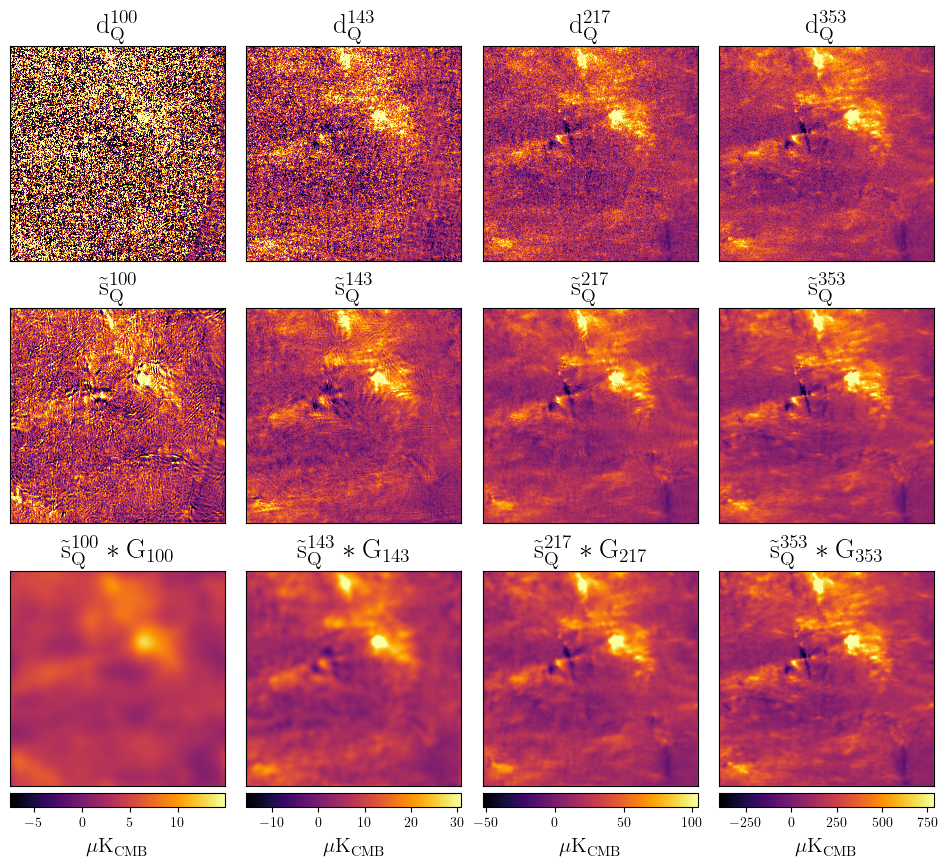

In [7]:
fig, ax = plt.subplots(3, 4, figsize=(11, 10), sharex=True, sharey=True)

from_100_to_353 = 1 / 0.0190
from_143_to_353 = 1 / 0.0394
from_217_to_353 = 1 / 0.132

vmin_353 = np.mean(after_sep[0,3])-4*np.std(after_sep[0,3])
vmax_353 = np.mean(after_sep[0,3])+4*np.std(after_sep[0,3])
vmin_217 = vmin_353 / from_217_to_353
vmax_217 = vmax_353 / from_217_to_353
vmin_143 = vmin_353 / from_143_to_353
vmax_143 = vmax_353 / from_143_to_353
vmin_100 = vmin_353 / from_100_to_353
vmax_100 = vmax_353 / from_100_to_353

A = plot_subplot(0,0,before_sep[0,0],r'$\rm{d_Q^{100}}$',v=(vmin_100,vmax_100))
B = plot_subplot(0,1,before_sep[0,1],r'$\rm{d_Q^{143}}$',v=(vmin_143,vmax_143))
C = plot_subplot(0,2,before_sep[0,2],r'$\rm{d_Q^{217}}$',v=(vmin_217,vmax_217))
D = plot_subplot(0,3,before_sep[0,3],r'$\rm{d_Q^{353}}$',v=(vmin_353,vmax_353))
E = plot_subplot(1,0,after_sep[0,0],r'$\rm{\tilde{s}_Q^{100}}$',v=(vmin_100,vmax_100))
F = plot_subplot(1,1,after_sep[0,1],r'$\rm{\tilde{s}_Q^{143}}$',v=(vmin_143,vmax_143))
G = plot_subplot(1,2,after_sep[0,2],r'$\rm{\tilde{s}_Q^{217}}$',v=(vmin_217,vmax_217))
H = plot_subplot(1,3,after_sep[0,3],r'$\rm{\tilde{s}_Q^{353}}$',v=(vmin_353,vmax_353))
I = plot_subplot(2,0,beam(after_sep[0,0],108),r'$\rm{\tilde{s}_Q^{100} \ast G_{100}}$',v=(vmin_100,vmax_100))
J = plot_subplot(2,1,beam(after_sep[0,1],36),r'$\rm{\tilde{s}_Q^{143} \ast G_{143}}$',v=(vmin_143,vmax_143))
K = plot_subplot(2,2,beam(after_sep[0,2],18),r'$\rm{\tilde{s}_Q^{217} \ast G_{217}}$',v=(vmin_217,vmax_217))
L = plot_subplot(2,3,beam(after_sep[0,3],11),r'$\rm{\tilde{s}_Q^{353} \ast G_{353}}$',v=(vmin_353,vmax_353))

set_colorbar(I,2,0,label=r'$\rm{\mu K_{CMB}}$',location='bottom')
set_colorbar(J,2,1,label=r'$\rm{\mu K_{CMB}}$',location='bottom')
set_colorbar(K,2,2,label=r'$\rm{\mu K_{CMB}}$',location='bottom')
set_colorbar(L,2,3,label=r'$\rm{\mu K_{CMB}}$',location='bottom')

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.1,hspace=-0.3)

#plt.savefig('Fig1_Q_maps.pdf')

## U maps

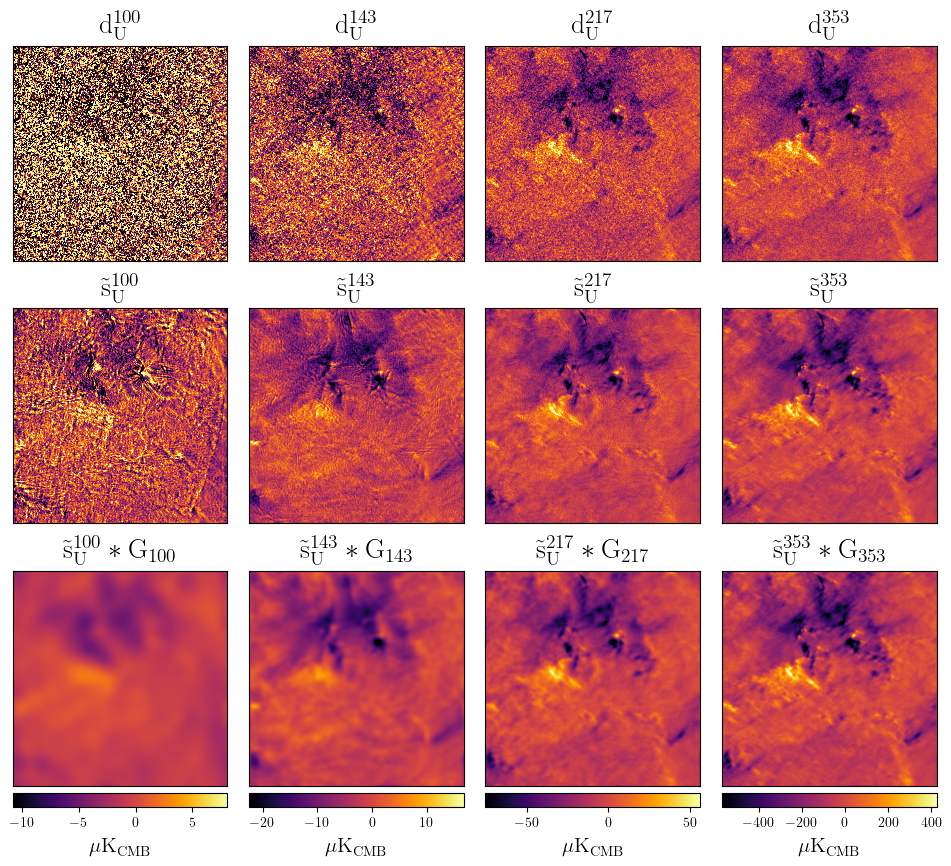

In [8]:
fig, ax = plt.subplots(3, 4, figsize=(11, 10), sharex=True, sharey=True)

from_100_to_353 = 1 / 0.0190
from_143_to_353 = 1 / 0.0394
from_217_to_353 = 1 / 0.132

vmin_353 = np.mean(after_sep[1,3])-4*np.std(after_sep[1,3])
vmax_353 = np.mean(after_sep[1,3])+4*np.std(after_sep[1,3])
vmin_217 = vmin_353 / from_217_to_353
vmax_217 = vmax_353 / from_217_to_353
vmin_143 = vmin_353 / from_143_to_353
vmax_143 = vmax_353 / from_143_to_353
vmin_100 = vmin_353 / from_100_to_353
vmax_100 = vmax_353 / from_100_to_353

A = plot_subplot(0,0,before_sep[1,0],r'$\rm{d_U^{100}}$',v=(vmin_100,vmax_100))
B = plot_subplot(0,1,before_sep[1,1],r'$\rm{d_U^{143}}$',v=(vmin_143,vmax_143))
C = plot_subplot(0,2,before_sep[1,2],r'$\rm{d_U^{217}}$',v=(vmin_217,vmax_217))
D = plot_subplot(0,3,before_sep[1,3],r'$\rm{d_U^{353}}$',v=(vmin_353,vmax_353))
E = plot_subplot(1,0,after_sep[1,0],r'$\rm{\tilde{s}_U^{100}}$',v=(vmin_100,vmax_100))
F = plot_subplot(1,1,after_sep[1,1],r'$\rm{\tilde{s}_U^{143}}$',v=(vmin_143,vmax_143))
G = plot_subplot(1,2,after_sep[1,2],r'$\rm{\tilde{s}_U^{217}}$',v=(vmin_217,vmax_217))
H = plot_subplot(1,3,after_sep[1,3],r'$\rm{\tilde{s}_U^{353}}$',v=(vmin_353,vmax_353))
I = plot_subplot(2,0,beam(after_sep[1,0],108),r'$\rm{\tilde{s}_U^{100} \ast G_{100}}$',v=(vmin_100,vmax_100))
J = plot_subplot(2,1,beam(after_sep[1,1],36),r'$\rm{\tilde{s}_U^{143} \ast G_{143}}$',v=(vmin_143,vmax_143))
K = plot_subplot(2,2,beam(after_sep[1,2],18),r'$\rm{\tilde{s}_U^{217} \ast G_{217}}$',v=(vmin_217,vmax_217))
L = plot_subplot(2,3,beam(after_sep[1,3],11),r'$\rm{\tilde{s}_U^{353} \ast G_{353}}$',v=(vmin_353,vmax_353))

set_colorbar(I,2,0,label=r'$\rm{\mu K_{CMB}}$',location='bottom')
set_colorbar(J,2,1,label=r'$\rm{\mu K_{CMB}}$',location='bottom')
set_colorbar(K,2,2,label=r'$\rm{\mu K_{CMB}}$',location='bottom')
set_colorbar(L,2,3,label=r'$\rm{\mu K_{CMB}}$',location='bottom')

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.1,hspace=-0.3)

#plt.savefig('Fig1bis_U_maps.pdf')

# Power spectra

## Q power spectra of the model 

In [5]:
from_100_to_353 = 1 / 0.0190
from_143_to_353 = 1 / 0.0394
from_217_to_353 = 1 / 0.132

In [8]:
a = 64
raw_Q = np.array([before_sep[0,1]*from_143_to_353,before_sep[0,2]*from_217_to_353,before_sep[0,3]])

QU_syn_143 = np.load(data_folder+'50_QU_synthesis_143_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)
QU_syn_217 = np.load(data_folder+'50_QU_synthesis_217_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)
QU_syn_353 = np.load(data_folder+'50_QU_synthesis_353_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)

In [9]:
reso = 2.35
apo = 0.95
N_bin = 40
v = 3

ax_Q, PS_raw_Q, _ = plot_PS(raw_Q,['RAW 143','RAW 217','RAW 353'],colors=[color[1],color[2],color[3]],styles=['-','-','-'],reso=reso,apo=apo,N_bin=N_bin,a=v,abs_cross=False,axis='l',fontsize=15,ret_PS=True,plot=False)
ax_Q, mean_Q, std_Q = plot_PS(np.concatenate((np.expand_dims(QU_syn_143[1:,0],1),np.expand_dims(QU_syn_217[1:,0],1),np.expand_dims(QU_syn_353[1:,0],1)),axis=1),['WPH 143','WPH 217','WPH 353'],colors=[color[1],color[2],color[3]],styles=['--','--','--'],reso=reso,apo=apo,N_bin=N_bin,a=v,abs_cross=False,axis='l',fontsize=15,ret_PS=True,plot=False)

In [10]:
def l_to_arcmin(l):
    return 2*60*180/l
def arcmin_to_l(arcmin):
    return 2*60*180/arcmin

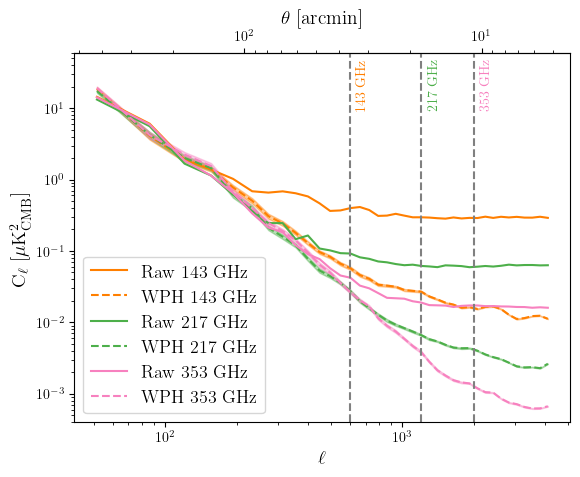

In [11]:
fontsize = 14

plt.figure()
plt.loglog()

plt.plot(ax_Q,PS_raw_Q[0],label=r'$\rm{Raw \ 143 \ GHz}$',color=color[1],linestyle='-')
plt.plot(ax_Q,mean_Q[0],label=r'$\rm{WPH \ 143 \ GHz}$',color=color[1],linestyle='--')
plt.fill_between(ax_Q,mean_Q[0]-std_Q[0],mean_Q[0]+std_Q[0],color=color[1],alpha=0.4)

plt.plot(ax_Q,PS_raw_Q[1],label=r'$\rm{Raw \ 217 \ GHz}$',color=color[2],linestyle='-')
plt.plot(ax_Q,mean_Q[1],label=r'$\rm{WPH \ 217 \ GHz}$',color=color[2],linestyle='--')
plt.fill_between(ax_Q,mean_Q[1]-std_Q[1],mean_Q[1]+std_Q[1],color=color[2],alpha=0.4)

plt.plot(ax_Q,PS_raw_Q[2],label=r'$\rm{Raw \ 353 \ GHz}$',color=color[3],linestyle='-')
plt.plot(ax_Q,mean_Q[2],label=r'$\rm{WPH \ 353 \ GHz}$',color=color[3],linestyle='--')
plt.fill_between(ax_Q,mean_Q[2]-std_Q[2],mean_Q[2]+std_Q[2],color=color[3],alpha=0.4)

plt.ylabel(r'$\rm{C_\ell \ [\mu K^2_{CMB}]}$',fontsize=fontsize)
plt.xlabel(r'$\rm{\ell}$',fontsize=fontsize)
plt.ylim(4*1e-4,6*1e1)
topaxis=plt.gca().secondary_xaxis('top',functions=(l_to_arcmin,arcmin_to_l))
topaxis.set_xlabel(r'$\rm{\theta \ [arcmin]}$',labelpad=5,fontsize=fontsize)
plt.axvline(2000,ls='--',color='grey')
plt.text(2000*1.07,10,r'$\rm{353 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[3])
plt.axvline(1200,ls='--',color='grey')
plt.text(1200*1.07,10,r'$\rm{217 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[2])
plt.axvline(600,ls='--',color='grey')
plt.text(600*1.07,10,r'$\rm{143 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[1])
plt.legend(fontsize=fontsize-1)

plt.savefig('/home/auclair/Thèse_LPENS/Informatique/Images/figures_QU/Fig2_PS_Q_maps.pdf',bbox_inches='tight')

## TEB spectra

In [12]:
def apodize(na, nb, radius):
    na = int(na)
    nb = int(nb)
    ni = int(radius * na)
    nj = int(radius * nb)
    dni = na - ni
    dnj = nb - nj
    tap1d_x = np.zeros(na) + 1.0
    tap1d_y = np.zeros(nb) + 1.0
    tap1d_x[:dni] = (np.cos(3*np.pi/2.+np.pi/2.*(1.*np.linspace(0,dni-1,dni)/(dni-1)) ))
    tap1d_x[na-dni:] = (np.cos(0.+np.pi/2.*(1.*np.linspace(0,dni-1,dni)/(dni-1)) ))
    tap1d_y[:dnj] = (np.cos(3*np.pi/2.+np.pi/2.*(1.*np.linspace(0,dnj-1,dnj)/(dnj-1)) ))
    tap1d_y[nb-dnj:] = (np.cos(0.+np.pi/2.*(1.*np.linspace(0,dnj-1,dnj)/(dnj-1)) ))
    tapper = np.zeros([na,nb])
    for i in range(nb):
        tapper[:,i] = tap1d_x
    for i in range(na):
        tapper[i,:] = tapper[i,:] * tap1d_y
    return tapper

def compute_TEB_spectra(I,Q,U,Lx,Ly,b,mask,w00,w02,w22):
    f0 = nmt.NmtFieldFlat(Lx, Ly, mask, [I])
    f2 = nmt.NmtFieldFlat(Lx, Ly, mask, [Q, U])
    cl00_coupled = nmt.compute_coupled_cell_flat(f0, f0, b)
    cl00 = w00.decouple_cell(cl00_coupled)
    cl02_coupled = nmt.compute_coupled_cell_flat(f0, f2, b)
    cl02 = w02.decouple_cell(cl02_coupled)
    cl22_coupled = nmt.compute_coupled_cell_flat(f2, f2, b)
    cl22 = w22.decouple_cell(cl22_coupled)
    T = cl00[0]
    E = cl22[0]
    TE = cl02[0]
    B = cl22[3]
    TB = cl02[1]
    return T, E, B, TE, TB

def compute_EB_HM_spectra(Q_HM1,U_HM1,Q_HM2,U_HM2,Q_CMB,U_CMB,Lx,Ly,b,mask,w22):
    f2_HM1 = nmt.NmtFieldFlat(Lx, Ly, mask, [Q_HM1, U_HM1])
    f2_HM2 = nmt.NmtFieldFlat(Lx, Ly, mask, [Q_HM2, U_HM2])
    f2_CMB = nmt.NmtFieldFlat(Lx, Ly, mask, [Q_CMB, U_CMB])
    cl22_HM_coupled = nmt.compute_coupled_cell_flat(f2_HM1, f2_HM2, b)
    cl22_HM = w22.decouple_cell(cl22_HM_coupled)
    E_HM = cl22_HM[0]
    B_HM = cl22_HM[3]
    cl22_CMB_coupled = nmt.compute_coupled_cell_flat(f2_CMB, f2_CMB, b)
    cl22_CMB = w22.decouple_cell(cl22_CMB_coupled)
    E_CMB = cl22_CMB[0]
    B_CMB = cl22_CMB[3]
    return E_HM, E_CMB, B_HM, B_CMB

In [13]:
a = 64
Nx = 512
Ny = 512
Lx = Nx * reso / 60 * np.pi / 180
Ly = Ny * reso / 60 * np.pi / 180

mask = apodize(Nx,Ny,radius = 0.95)

l0_bins = np.arange(Nx/8) * 8 * np.pi/Lx
lf_bins = (np.arange(Nx/8)+1) * 8 * np.pi/Lx
b = nmt.NmtBinFlat(l0_bins, lf_bins)
ells = b.get_effective_ells()

folder = "/home/auclair/Thèse_LPENS/Informatique/Data/TE correlation/"
saved = True

if saved:
    w00 = nmt.NmtWorkspaceFlat()
    w00.read_from(folder+"w00_flat.fits")
    w02 = nmt.NmtWorkspaceFlat()
    w02.read_from(folder+"w02_flat.fits")
    w22 = nmt.NmtWorkspaceFlat()
    w22.read_from(folder+"w22_flat.fits")
else:
    w00 = nmt.NmtWorkspaceFlat()
    w00.compute_coupling_matrix(f0, f0, b)
    w02 = nmt.NmtWorkspaceFlat()
    w02.compute_coupling_matrix(f0, f2, b)
    w22 = nmt.NmtWorkspaceFlat()
    w22.compute_coupling_matrix(f2, f2, b)
    w00.write_to(folder+"w00_flat.fits")
    w02.write_to(folder+"w02_flat.fits")
    w22.write_to(folder+"w22_flat.fits")

In [14]:
I_353 = np.load(data_folder+'Sroll20_I_353_FM_768px.npy')[2*a:-2*a,2*a:-2*a] - 450 + 27
Q_353_raw = before_sep[0,3][a:-a,a:-a]
U_353_raw = before_sep[1,3][a:-a,a:-a]
Q_217_raw = before_sep[0,2][a:-a,a:-a]*from_217_to_353
U_217_raw = before_sep[1,2][a:-a,a:-a]*from_217_to_353
Q_143_raw = before_sep[0,1][a:-a,a:-a]*from_143_to_353
U_143_raw = before_sep[1,1][a:-a,a:-a]*from_143_to_353

Q_353_raw_HM1 = d_Q_353_HM1[a:-a,a:-a]
U_353_raw_HM1 = d_U_353_HM1[a:-a,a:-a]
Q_353_raw_HM2 = d_Q_353_HM2[a:-a,a:-a]
U_353_raw_HM2 = d_U_353_HM2[a:-a,a:-a]
Q_217_raw_HM1 = d_Q_217_HM1[a:-a,a:-a]*from_217_to_353
U_217_raw_HM1 = d_U_217_HM1[a:-a,a:-a]*from_217_to_353
Q_217_raw_HM2 = d_Q_217_HM2[a:-a,a:-a]*from_217_to_353
U_217_raw_HM2 = d_U_217_HM2[a:-a,a:-a]*from_217_to_353
Q_143_raw_HM1 = d_Q_143_HM1[a:-a,a:-a]*from_143_to_353
U_143_raw_HM1 = d_U_143_HM1[a:-a,a:-a]*from_143_to_353
Q_143_raw_HM2 = d_Q_143_HM2[a:-a,a:-a]*from_143_to_353
U_143_raw_HM2 = d_U_143_HM2[a:-a,a:-a]*from_143_to_353

CMB_Q_143 = np.load(data_folder+'CMB_Q_maps_143_768px.npy')[:,2*a:-2*a,2*a:-2*a]*from_143_to_353
CMB_Q_217 = np.load(data_folder+'CMB_Q_maps_217_768px.npy')[:,2*a:-2*a,2*a:-2*a]*from_217_to_353
CMB_Q_353 = np.load(data_folder+'CMB_Q_maps_353_768px.npy')[:,2*a:-2*a,2*a:-2*a]
CMB_U_143 = np.load(data_folder+'CMB_U_maps_143_768px.npy')[:,2*a:-2*a,2*a:-2*a]*from_143_to_353
CMB_U_217 = np.load(data_folder+'CMB_U_maps_217_768px.npy')[:,2*a:-2*a,2*a:-2*a]*from_217_to_353
CMB_U_353 = np.load(data_folder+'CMB_U_maps_353_768px.npy')[:,2*a:-2*a,2*a:-2*a]

QU_syn_143 = np.load(data_folder+'50_QU_synthesis_143_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)
QU_syn_217 = np.load(data_folder+'50_QU_synthesis_217_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)
QU_syn_353 = np.load(data_folder+'50_QU_synthesis_353_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)
IQU_syn_143 = np.concatenate((np.array([[I_353]]*np.shape(QU_syn_143)[0]),QU_syn_143),axis=1)
IQU_syn_217 = np.concatenate((np.array([[I_353]]*np.shape(QU_syn_217)[0]),QU_syn_217),axis=1)
IQU_syn_353 = np.concatenate((np.array([[I_353]]*np.shape(QU_syn_353)[0]),QU_syn_353),axis=1)

In [15]:
n_syn = 50

T_143_raw, E_143_raw, B_143_raw, TE_143_raw, TB_143_raw = compute_TEB_spectra(I_353,Q_143_raw,U_143_raw,Lx,Ly,b,mask,w00,w02,w22)
T_217_raw, E_217_raw, B_217_raw, TE_217_raw, TB_217_raw = compute_TEB_spectra(I_353,Q_217_raw,U_217_raw,Lx,Ly,b,mask,w00,w02,w22)
T_353_raw, E_353_raw, B_353_raw, TE_353_raw, TB_353_raw = compute_TEB_spectra(I_353,Q_353_raw,U_353_raw,Lx,Ly,b,mask,w00,w02,w22)

E_HM_143, E_CMB_143, B_HM_143, B_CMB_143 = compute_EB_HM_spectra(Q_143_raw_HM1,U_143_raw_HM1,Q_143_raw_HM2,U_143_raw_HM2,CMB_Q_143[0],CMB_U_143[0],Lx,Ly,b,mask,w22)
E_HM_217, E_CMB_217, B_HM_217, B_CMB_217 = compute_EB_HM_spectra(Q_217_raw_HM1,U_217_raw_HM1,Q_217_raw_HM2,U_217_raw_HM2,CMB_Q_217[0],CMB_U_217[0],Lx,Ly,b,mask,w22)
E_HM_353, E_CMB_353, B_HM_353, B_CMB_353 = compute_EB_HM_spectra(Q_353_raw_HM1,U_353_raw_HM1,Q_353_raw_HM2,U_353_raw_HM2,CMB_Q_353[0],CMB_U_353[0],Lx,Ly,b,mask,w22)

sample_T_143 = np.zeros((n_syn,len(ells)))
sample_E_143 = np.zeros((n_syn,len(ells)))
sample_B_143 = np.zeros((n_syn,len(ells)))
sample_TE_143 = np.zeros((n_syn,len(ells)))
sample_TB_143 = np.zeros((n_syn,len(ells)))

sample_T_217 = np.zeros((n_syn,len(ells)))
sample_E_217 = np.zeros((n_syn,len(ells)))
sample_B_217 = np.zeros((n_syn,len(ells)))
sample_TE_217 = np.zeros((n_syn,len(ells)))
sample_TB_217 = np.zeros((n_syn,len(ells)))

sample_T_353 = np.zeros((n_syn,len(ells)))
sample_E_353 = np.zeros((n_syn,len(ells)))
sample_B_353 = np.zeros((n_syn,len(ells)))
sample_TE_353 = np.zeros((n_syn,len(ells)))
sample_TB_353 = np.zeros((n_syn,len(ells)))

for i in range(n_syn):
    sample_T_143[i], sample_E_143[i], sample_B_143[i], sample_TE_143[i], sample_TB_143[i] = compute_TEB_spectra(IQU_syn_143[i+1,0],IQU_syn_143[i+1,1],IQU_syn_143[i+1,2],Lx,Ly,b,mask,w00,w02,w22)
    sample_T_217[i], sample_E_217[i], sample_B_217[i], sample_TE_217[i], sample_TB_217[i] = compute_TEB_spectra(IQU_syn_217[i+1,0],IQU_syn_217[i+1,1],IQU_syn_217[i+1,2],Lx,Ly,b,mask,w00,w02,w22)
    sample_T_353[i], sample_E_353[i], sample_B_353[i], sample_TE_353[i], sample_TB_353[i] = compute_TEB_spectra(IQU_syn_353[i+1,0],IQU_syn_353[i+1,1],IQU_syn_353[i+1,2],Lx,Ly,b,mask,w00,w02,w22)
mean_T_143 = np.mean(sample_T_143,axis=0)
std_T_143 = np.std(sample_T_143,axis=0)
mean_E_143 = np.mean(sample_E_143,axis=0)
std_E_143 = np.std(sample_E_143,axis=0)
mean_B_143 = np.mean(sample_B_143,axis=0)
std_B_143 = np.std(sample_B_143,axis=0)
mean_TE_143 = np.mean(sample_TE_143,axis=0)
std_TE_143 = np.std(sample_TE_143,axis=0)
mean_TB_143 = np.mean(sample_TB_143,axis=0)
std_TB_143 = np.std(sample_TB_143,axis=0)

mean_T_217 = np.mean(sample_T_217,axis=0)
std_T_217 = np.std(sample_T_217,axis=0)
mean_E_217 = np.mean(sample_E_217,axis=0)
std_E_217 = np.std(sample_E_217,axis=0)
mean_B_217 = np.mean(sample_B_217,axis=0)
std_B_217 = np.std(sample_B_217,axis=0)
mean_TE_217 = np.mean(sample_TE_217,axis=0)
std_TE_217 = np.std(sample_TE_217,axis=0)
mean_TB_217 = np.mean(sample_TB_217,axis=0)
std_TB_217 = np.std(sample_TB_217,axis=0)

mean_T_353 = np.mean(sample_T_353,axis=0)
std_T_353 = np.std(sample_T_353,axis=0)
mean_E_353 = np.mean(sample_E_353,axis=0)
std_E_353 = np.std(sample_E_353,axis=0)
mean_B_353 = np.mean(sample_B_353,axis=0)
std_B_353 = np.std(sample_B_353,axis=0)
mean_TE_353 = np.mean(sample_TE_353,axis=0)
std_TE_353 = np.std(sample_TE_353,axis=0)
mean_TB_353 = np.mean(sample_TB_353,axis=0)
std_TB_353 = np.std(sample_TB_353,axis=0)

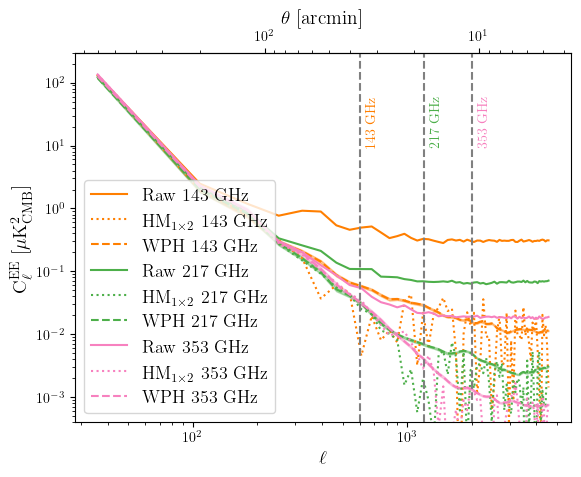

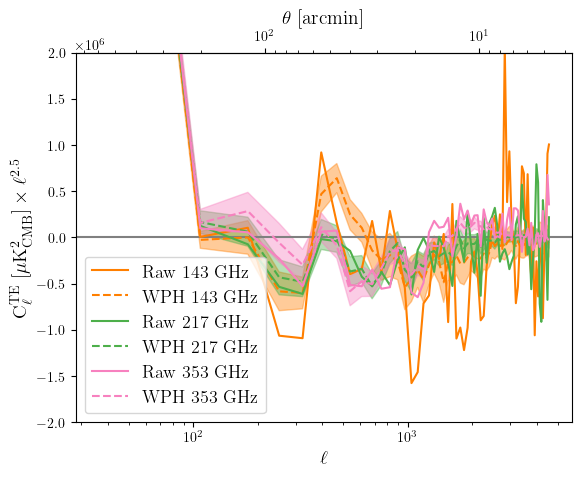

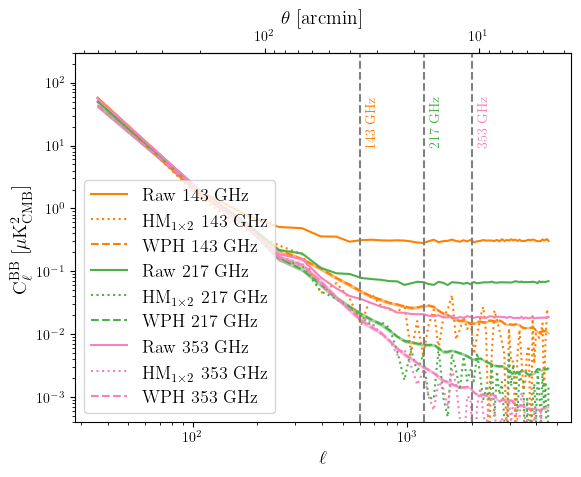

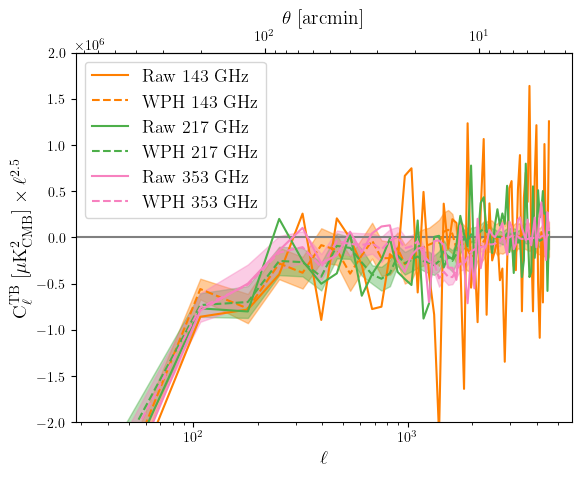

In [16]:
fontsize = 14

plt.figure()
plt.loglog()

plt.plot(ells,E_143_raw,label=r'$\rm{Raw \ 143 \ GHz}$',color=color[1],linestyle='-')
plt.plot(ells,np.abs(E_HM_143-E_CMB_143),label=r'$\rm{HM_{1 \times 2} \ 143 \ GHz}$',color=color[1],linestyle='dotted')
plt.plot(ells,mean_E_143,label=r'$\rm{WPH \ 143 \ GHz}$',color=color[1],linestyle='--')
plt.fill_between(ells,mean_E_143-std_E_143,mean_E_143+std_E_143,color=color[1],alpha=0.4)

plt.plot(ells,E_217_raw,label=r'$\rm{Raw \ 217 \ GHz}$',color=color[2],linestyle='-')
plt.plot(ells,np.abs(E_HM_217-E_CMB_217),label=r'$\rm{HM_{1 \times 2} \ 217 \ GHz}$',color=color[2],linestyle='dotted')
plt.plot(ells,mean_E_217,label=r'$\rm{WPH \ 217 \ GHz}$',color=color[2],linestyle='--')
plt.fill_between(ells,mean_E_217-std_E_217,mean_E_217+std_E_217,color=color[2],alpha=0.4)

plt.plot(ells,E_353_raw,label=r'$\rm{Raw \ 353 \ GHz}$',color=color[3],linestyle='-')
plt.plot(ells,np.abs(E_HM_353-E_CMB_353),label=r'$\rm{HM_{1 \times 2} \ 353 \ GHz}$',color=color[3],linestyle='dotted')
plt.plot(ells,mean_E_353,label=r'$\rm{WPH \ 353 \ GHz}$',color=color[3],linestyle='--')
plt.fill_between(ells,mean_E_353-std_E_353,mean_E_353+std_E_353,color=color[3],alpha=0.4)

plt.ylabel(r'$\rm{C_\ell^{EE} \ [\mu K^2_{CMB}]}$',fontsize=fontsize)
plt.xlabel(r'$\rm{\ell}$',fontsize=fontsize)
plt.ylim(4*1e-4,3*1e2)
topaxis=plt.gca().secondary_xaxis('top',functions=(l_to_arcmin,arcmin_to_l))
topaxis.set_xlabel(r'$\rm{\theta \ [arcmin]}$',labelpad=5,fontsize=fontsize)
plt.axvline(2000,ls='--',color='grey')
plt.text(2000*1.07,10,r'$\rm{353 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[3])
plt.axvline(1200,ls='--',color='grey')
plt.text(1200*1.07,10,r'$\rm{217 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[2])
plt.axvline(600,ls='--',color='grey')
plt.text(600*1.07,10,r'$\rm{143 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[1])
plt.legend(fontsize=fontsize-1)
#plt.savefig('EE_spectra.pdf',bbox_inches='tight')

b = 2.5
plt.figure()
plt.xscale('log')

plt.axhline(0,ls='-',color='grey')

plt.plot(ells,ells**b*TE_143_raw,label=r'$\rm{Raw \ 143 \ GHz}$',color=color[1],linestyle='-')
plt.plot(ells,ells**b*mean_TE_143,label=r'$\rm{WPH \ 143 \ GHz}$',color=color[1],linestyle='--')
plt.fill_between(ells,ells**b*(mean_TE_143-std_TE_143),ells**b*(mean_TE_143+std_TE_143),color=color[1],alpha=0.4)

plt.plot(ells,ells**b*TE_217_raw,label=r'$\rm{Raw \ 217 \ GHz}$',color=color[2],linestyle='-')
plt.plot(ells,ells**b*mean_TE_217,label=r'$\rm{WPH \ 217 \ GHz}$',color=color[2],linestyle='--')
plt.fill_between(ells,ells**b*(mean_TE_217-std_TE_217),ells**b*(mean_TE_217+std_TE_217),color=color[2],alpha=0.4)

plt.plot(ells,ells**b*TE_353_raw,label=r'$\rm{Raw \ 353 \ GHz}$',color=color[3],linestyle='-')
plt.plot(ells,ells**b*mean_TE_353,label=r'$\rm{WPH \ 353 \ GHz}$',color=color[3],linestyle='--')
plt.fill_between(ells,ells**b*(mean_TE_353-std_TE_353),ells**b*(mean_TE_353+std_TE_353),color=color[3],alpha=0.4)

plt.ylabel(r'$\rm{C_\ell^{TE} \ [\mu K^2_{CMB}] \times \ell^{2.5}}$',fontsize=fontsize)
plt.xlabel(r'$\rm{\ell}$',fontsize=fontsize)
plt.ylim(-0.2*10**7,0.2*10**7)
topaxis=plt.gca().secondary_xaxis('top',functions=(l_to_arcmin,arcmin_to_l))
topaxis.set_xlabel(r'$\rm{\theta \ [arcmin]}$',labelpad=5,fontsize=fontsize)
plt.legend(fontsize=fontsize-1)
#plt.savefig('TE_spectra.pdf',bbox_inches='tight')

plt.figure()
plt.loglog()

plt.plot(ells,B_143_raw,label=r'$\rm{Raw \ 143 \ GHz}$',color=color[1],linestyle='-')
plt.plot(ells,np.abs(B_HM_143-B_CMB_143),label=r'$\rm{HM_{1 \times 2} \ 143 \ GHz}$',color=color[1],linestyle='dotted')
plt.plot(ells,mean_B_143,label=r'$\rm{WPH \ 143 \ GHz}$',color=color[1],linestyle='--')
plt.fill_between(ells,mean_B_143-std_B_143,mean_B_143+std_B_143,color=color[1],alpha=0.4)

plt.plot(ells,B_217_raw,label=r'$\rm{Raw \ 217 \ GHz}$',color=color[2],linestyle='-')
plt.plot(ells,np.abs(B_HM_217-B_CMB_217),label=r'$\rm{HM_{1 \times 2} \ 217 \ GHz}$',color=color[2],linestyle='dotted')
plt.plot(ells,mean_B_217,label=r'$\rm{WPH \ 217 \ GHz}$',color=color[2],linestyle='--')
plt.fill_between(ells,mean_B_217-std_B_217,mean_B_217+std_B_217,color=color[2],alpha=0.4)

plt.plot(ells,B_353_raw,label=r'$\rm{Raw \ 353 \ GHz}$',color=color[3],linestyle='-')
plt.plot(ells,np.abs(B_HM_353-B_CMB_353),label=r'$\rm{HM_{1 \times 2} \ 353 \ GHz}$',color=color[3],linestyle='dotted')
plt.plot(ells,mean_B_353,label=r'$\rm{WPH \ 353 \ GHz}$',color=color[3],linestyle='--')
plt.fill_between(ells,mean_B_353-std_B_353,mean_B_353+std_B_353,color=color[3],alpha=0.4)

plt.ylabel(r'$\rm{C_\ell^{BB} \ [\mu K^2_{CMB}]}$',fontsize=fontsize)
plt.xlabel(r'$\rm{\ell}$',fontsize=fontsize)
plt.ylim(4*1e-4,3*1e2)
topaxis=plt.gca().secondary_xaxis('top',functions=(l_to_arcmin,arcmin_to_l))
topaxis.set_xlabel(r'$\rm{\theta \ [arcmin]}$',labelpad=5,fontsize=fontsize)
plt.axvline(2000,ls='--',color='grey')
plt.text(2000*1.07,10,r'$\rm{353 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[3])
plt.axvline(1200,ls='--',color='grey')
plt.text(1200*1.07,10,r'$\rm{217 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[2])
plt.axvline(600,ls='--',color='grey')
plt.text(600*1.07,10,r'$\rm{143 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[1])
plt.legend(fontsize=fontsize-1)
#plt.savefig('BB_spectra.pdf',bbox_inches='tight')

b = 2.5
plt.figure()
plt.xscale('log')

plt.axhline(0,ls='-',color='grey')

plt.plot(ells,ells**b*TB_143_raw,label=r'$\rm{Raw \ 143 \ GHz}$',color=color[1],linestyle='-')
plt.plot(ells,ells**b*mean_TB_143,label=r'$\rm{WPH \ 143 \ GHz}$',color=color[1],linestyle='--')
plt.fill_between(ells,ells**b*(mean_TB_143-std_TB_143),ells**b*(mean_TB_143+std_TB_143),color=color[1],alpha=0.4)

plt.plot(ells,ells**b*TB_217_raw,label=r'$\rm{Raw \ 217 \ GHz}$',color=color[2],linestyle='-')
plt.plot(ells,ells**b*mean_TB_217,label=r'$\rm{WPH \ 217 \ GHz}$',color=color[2],linestyle='--')
plt.fill_between(ells,ells**b*(mean_TB_217-std_TB_217),ells**b*(mean_TB_217+std_TB_217),color=color[2],alpha=0.4)

plt.plot(ells,ells**b*TB_353_raw,label=r'$\rm{Raw \ 353 \ GHz}$',color=color[3],linestyle='-')
plt.plot(ells,ells**b*mean_TB_353,label=r'$\rm{WPH \ 353 \ GHz}$',color=color[3],linestyle='--')
plt.fill_between(ells,ells**b*(mean_TB_353-std_TB_353),ells**b*(mean_TB_353+std_TB_353),color=color[3],alpha=0.4)

plt.ylabel(r'$\rm{C_\ell^{TB} \ [\mu K^2_{CMB}] \times \ell^{2.5}}$',fontsize=fontsize)
plt.xlabel(r'$\rm{\ell}$',fontsize=fontsize)
plt.ylim(-0.2*10**7,0.2*10**7)
topaxis=plt.gca().secondary_xaxis('top',functions=(l_to_arcmin,arcmin_to_l))
topaxis.set_xlabel(r'$\rm{\theta \ [arcmin]}$',labelpad=5,fontsize=fontsize)

#plt.savefig('TB_spectra.pdf',bbox_inches='tight')

## Q power spectra versus SNR

In [91]:
ax_353 = ax_Q
PS_353 = mean_Q[2]

A = 1.55*1e6
b = -2.8
power_law = np.concatenate((PS_353[:1],A*ax_353[1:]**b))

from scipy.interpolate import interp1d
f_PS_truth_Q = interp1d(ax_353,power_law,fill_value='extrapolate')

eff_fwhm_beams = [7.27,5.01,4.86]
def lobe(freq,reso=2.35,size=512):
    sigma_arcmin = eff_fwhm_beams[freq] / 2.355
    sigma_pixel = sigma_arcmin / reso
    gauss_map = np.array(Gaussian2DKernel(sigma_pixel,x_size=size,y_size=size))
    return gauss_map
gauss_143 = lobe(0)
gauss_217 = lobe(1)
gauss_353 = lobe(2)

ax, PS_beams, _ = plot_PS(np.array([gauss_143,gauss_217,gauss_353]),['143','217','353'],colors=[color[1],color[2],color[3]],styles=['-','-','-'],reso=reso,apo=apo,N_bin=N_bin,a=v,abs_cross=False,axis='l',fontsize=15,ret_PS=True,plot=False)

f_PS_beam_143 = interp1d(ax_353,PS_beams[0]/PS_beams[0][0],fill_value='extrapolate')
f_PS_beam_217 = interp1d(ax_353,PS_beams[1]/PS_beams[1][0],fill_value='extrapolate')
f_PS_beam_353 = interp1d(ax_353,PS_beams[2]/PS_beams[2][0],fill_value='extrapolate')

PS_ref_143 = f_PS_truth_Q(ax_353)*f_PS_beam_143(ax_353)
PS_ref_217 = f_PS_truth_Q(ax_353)*f_PS_beam_217(ax_353)
PS_ref_353 = f_PS_truth_Q(ax_353)*f_PS_beam_353(ax_353)

if False:
    plt.figure()
    plt.loglog(ax_353,PS_353)
    plt.loglog(ax_353,power_law)
    plt.loglog(ax_353,f_PS_truth_Q(ax_353))
    plt.loglog(ax_353,PS_ref_143)
    plt.loglog(ax_353,PS_ref_217)
    plt.loglog(ax_353,PS_ref_353)
    plt.show()

In [35]:
CMB_Q_143 = np.load(data_folder+'CMB_Q_maps_143_768px.npy')[:,a:-a,a:-a]
CMB_Q_217 = np.load(data_folder+'CMB_Q_maps_217_768px.npy')[:,a:-a,a:-a]
CMB_Q_353 = np.load(data_folder+'CMB_Q_maps_353_768px.npy')[:,a:-a,a:-a]
noise_Q_143 = np.load(data_folder+'Sroll20_Noise_Q_143_maps.npy')[0,:,a:-a,a:-a]
noise_Q_217 = np.load(data_folder+'Sroll20_Noise_Q_217_maps.npy')[0,:,a:-a,a:-a]
noise_Q_353 = np.load(data_folder+'Sroll20_Noise_Q_353_maps.npy')[0,:,a:-a,a:-a]

In [36]:
conta_Q_143 = CMB_Q_143 + noise_Q_143
conta_Q_217 = CMB_Q_217 + noise_Q_217
conta_Q_353 = CMB_Q_353 + noise_Q_353

In [37]:
conta_Q = np.zeros((100,3,N_pix-2*a,N_pix-2*a))
conta_Q[:,0] = conta_Q_143*from_143_to_353
conta_Q[:,1] = conta_Q_217*from_217_to_353
conta_Q[:,2] = conta_Q_353

In [95]:
PS_conta_Q = plot_PS(conta_Q,[r"\rm{Conta 143}",r"\rm{Conta 217}",r"\rm{Conta 353}"],reso=reso,apo=apo,N_bin=N_bin,a=v,axis='l',fontsize=15,ret_PS=True,plot=False)

In [96]:
SNR_143 = PS_ref_143/PS_conta_Q[1][0]
SNR_217 = PS_ref_217/PS_conta_Q[1][1]
SNR_353 = PS_ref_353/PS_conta_Q[1][2]

if False:
    plt.figure()
    plt.loglog()
    plt.plot(ax_353,SNR_143,label='143')
    plt.plot(ax_353,SNR_217,label='217')
    plt.plot(ax_353,SNR_353,label='353')
    plt.legend()

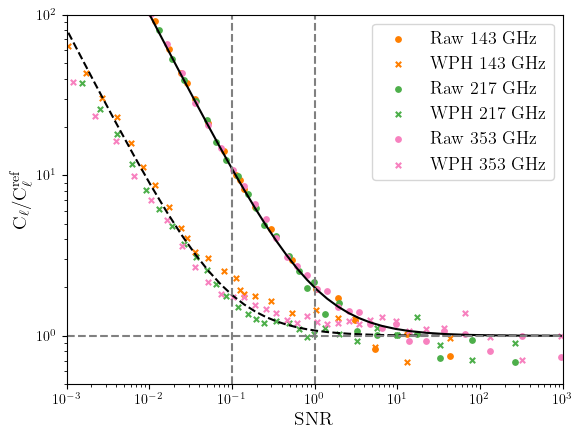

In [97]:
fontsize = 14
s = 15

plt.figure()

alpha = 0.08
plt.plot(SNR_353,1+1/SNR_353,color='black',ls='-')
plt.plot(SNR_353,1+alpha/SNR_353,color='black',ls='--')

plt.scatter(SNR_143,PS_raw_Q[0]/PS_ref_143,label=r'$\rm{Raw \ 143 \ GHz}$',color=color[1],marker='o',s=s)
plt.scatter(SNR_143,mean_Q[0]/PS_ref_143,label=r'$\rm{WPH \ 143 \ GHz}$',color=color[1],marker='x',s=s)

plt.scatter(SNR_217,PS_raw_Q[1]/PS_ref_217,label=r'$\rm{Raw \ 217 \ GHz}$',color=color[2],marker='o',s=s)
plt.scatter(SNR_217,mean_Q[1]/PS_ref_217,label=r'$\rm{WPH \ 217 \ GHz}$',color=color[2],marker='x',s=s)

plt.scatter(SNR_353,PS_raw_Q[2]/PS_ref_353,label=r'$\rm{Raw \ 353 \ GHz}$',color=color[3],marker='o',s=s)
plt.scatter(SNR_353,mean_Q[2]/PS_ref_353,label=r'$\rm{WPH \ 353 \ GHz}$',color=color[3],marker='x',s=s)

plt.legend(fontsize=fontsize-1)
plt.ylabel(r'$\rm{C_\ell / C_\ell^{ref}}$',fontsize=fontsize)
plt.xlabel(r'$\rm{SNR}$',fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.axhline(1,color='grey',ls='--')
plt.axvline(1,color='grey',ls='--')
plt.axvline(0.1,color='grey',ls='--')
plt.xlim(1e-3,1e3)
plt.ylim(0.5,1e2)

#plt.savefig('Fig3_PS_Q_maps_SNR.pdf',bbox_inches='tight')

## U power spectra of the model

In [98]:
from_100_to_353 = 1 / 0.0190
from_143_to_353 = 1 / 0.0394
from_217_to_353 = 1 / 0.132

In [99]:
a = 64
raw_U = np.array([before_sep[1,1]*from_143_to_353,before_sep[1,2]*from_217_to_353,before_sep[1,3]])

QU_syn_143 = np.load(data_folder+'50_QU_synthesis_143_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)
QU_syn_217 = np.load(data_folder+'50_QU_synthesis_217_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)
QU_syn_353 = np.load(data_folder+'50_QU_synthesis_353_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)

In [100]:
reso = 2.35
apo = 0.95
N_bin = 40
v = 3

ax_U, PS_raw_U, _ = plot_PS(raw_U,['RAW 143','RAW 217','RAW 353'],colors=[color[1],color[2],color[3]],styles=['-','-','-'],reso=reso,apo=apo,N_bin=N_bin,a=v,abs_cross=False,axis='l',fontsize=15,ret_PS=True,plot=False)
ax_U, mean_U, std_U = plot_PS(np.concatenate((np.expand_dims(QU_syn_143[1:,1],1),np.expand_dims(QU_syn_217[1:,1],1),np.expand_dims(QU_syn_353[1:,1],1)),axis=1),['WPH 143','WPH 217','WPH 353'],colors=[color[1],color[2],color[3]],styles=['--','--','--'],reso=reso,apo=apo,N_bin=N_bin,a=v,abs_cross=False,axis='l',fontsize=15,ret_PS=True,plot=False)

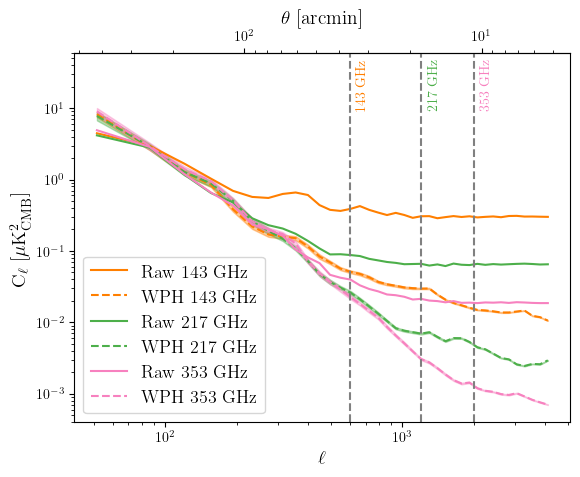

In [102]:
fontsize = 14

plt.figure()
plt.loglog()

plt.plot(ax_U,PS_raw_U[0],label=r'$\rm{Raw \ 143 \ GHz}$',color=color[1],linestyle='-')
plt.plot(ax_U,mean_U[0],label=r'$\rm{WPH \ 143 \ GHz}$',color=color[1],linestyle='--')
plt.fill_between(ax_U,mean_U[0]-std_U[0],mean_U[0]+std_U[0],color=color[1],alpha=0.4)

plt.plot(ax_U,PS_raw_U[1],label=r'$\rm{Raw \ 217 \ GHz}$',color=color[2],linestyle='-')
plt.plot(ax_U,mean_U[1],label=r'$\rm{WPH \ 217 \ GHz}$',color=color[2],linestyle='--')
plt.fill_between(ax_U,mean_U[1]-std_U[1],mean_U[1]+std_U[1],color=color[2],alpha=0.4)

plt.plot(ax_U,PS_raw_U[2],label=r'$\rm{Raw \ 353 \ GHz}$',color=color[3],linestyle='-')
plt.plot(ax_U,mean_U[2],label=r'$\rm{WPH \ 353 \ GHz}$',color=color[3],linestyle='--')
plt.fill_between(ax_U,mean_U[2]-std_U[2],mean_U[2]+std_U[2],color=color[3],alpha=0.4)

plt.ylabel(r'$\rm{C_\ell \ [\mu K^2_{CMB}]}$',fontsize=fontsize)
plt.xlabel(r'$\rm{\ell}$',fontsize=fontsize)
plt.ylim(4*1e-4,6*1e1)
topaxis=plt.gca().secondary_xaxis('top',functions=(l_to_arcmin,arcmin_to_l))
topaxis.set_xlabel(r'$\rm{\theta \ [arcmin]}$',labelpad=5,fontsize=fontsize)
plt.axvline(2000,ls='--',color='grey')
plt.text(2000*1.07,10,r'$\rm{353 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[3])
plt.axvline(1200,ls='--',color='grey')
plt.text(1200*1.07,10,r'$\rm{217 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[2])
plt.axvline(600,ls='--',color='grey')
plt.text(600*1.07,10,r'$\rm{143 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[1])
plt.legend(fontsize=fontsize-1)

#plt.savefig('Fig2bis_PS_U_maps.pdf',bbox_inches='tight')

## U power spectra versus SNR

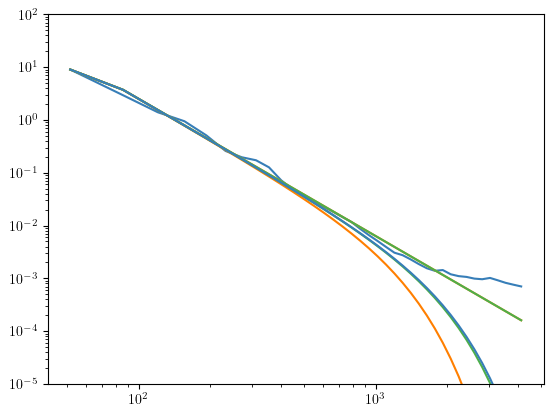

In [103]:
ax_353 = ax_U
PS_353 = mean_U[2]

A = 4*1e5
b = -2.6
power_law = np.concatenate((PS_353[:1],A*ax_353[1:]**b))

from scipy.interpolate import interp1d
f_PS_truth_U = interp1d(ax_353,power_law,fill_value='extrapolate')

eff_fwhm_beams = [7.27,5.01,4.86]
def lobe(freq,reso=2.35,size=512):
    sigma_arcmin = eff_fwhm_beams[freq] / 2.355
    sigma_pixel = sigma_arcmin / reso
    gauss_map = np.array(Gaussian2DKernel(sigma_pixel,x_size=size,y_size=size))
    return gauss_map
gauss_143 = lobe(0)
gauss_217 = lobe(1)
gauss_353 = lobe(2)

ax, PS_beams, _ = plot_PS(np.array([gauss_143,gauss_217,gauss_353]),['143','217','353'],colors=[color[1],color[2],color[3]],styles=['-','-','-'],reso=reso,apo=apo,N_bin=N_bin,a=v,abs_cross=False,axis='l',fontsize=15,ret_PS=True,plot=False)

f_PS_beam_143 = interp1d(ax_353,PS_beams[0]/PS_beams[0][0],fill_value='extrapolate')
f_PS_beam_217 = interp1d(ax_353,PS_beams[1]/PS_beams[1][0],fill_value='extrapolate')
f_PS_beam_353 = interp1d(ax_353,PS_beams[2]/PS_beams[2][0],fill_value='extrapolate')

PS_ref_143 = f_PS_truth_U(ax_353)*f_PS_beam_143(ax_353)
PS_ref_217 = f_PS_truth_U(ax_353)*f_PS_beam_217(ax_353)
PS_ref_353 = f_PS_truth_U(ax_353)*f_PS_beam_353(ax_353)

if True:
    plt.figure()
    plt.loglog(ax_353,PS_353)
    plt.loglog(ax_353,power_law)
    plt.loglog(ax_353,f_PS_truth_U(ax_353))
    plt.loglog(ax_353,PS_ref_143)
    plt.loglog(ax_353,PS_ref_217)
    plt.loglog(ax_353,PS_ref_353)
    plt.ylim(1e-5,1e2)
    plt.show()

In [41]:
CMB_U_143 = np.load(data_folder+'CMB_U_maps_143_768px.npy')[:,a:-a,a:-a]
CMB_U_217 = np.load(data_folder+'CMB_U_maps_217_768px.npy')[:,a:-a,a:-a]
CMB_U_353 = np.load(data_folder+'CMB_U_maps_353_768px.npy')[:,a:-a,a:-a]
noise_U_143 = np.load(data_folder+'Sroll20_Noise_U_143_maps.npy')[0,:,a:-a,a:-a]
noise_U_217 = np.load(data_folder+'Sroll20_Noise_U_217_maps.npy')[0,:,a:-a,a:-a]
noise_U_353 = np.load(data_folder+'Sroll20_Noise_U_353_maps.npy')[0,:,a:-a,a:-a]

In [42]:
conta_U_143 = CMB_U_143 + noise_U_143
conta_U_217 = CMB_U_217 + noise_U_217
conta_U_353 = CMB_U_353 + noise_U_353

In [106]:
conta_U = np.zeros((100,3,N_pix-2*a,N_pix-2*a))
conta_U[:,0] = conta_U_143*from_143_to_353
conta_U[:,1] = conta_U_217*from_217_to_353
conta_U[:,2] = conta_U_353

In [107]:
PS_conta_U = plot_PS(conta_U,[r"\rm{Conta 143}",r"\rm{Conta 217}",r"\rm{Conta 353}"],reso=reso,apo=apo,N_bin=N_bin,a=v,axis='l',fontsize=15,ret_PS=True,plot=False)

In [108]:
SNR_143 = PS_ref_143/PS_conta_U[1][0]
SNR_217 = PS_ref_217/PS_conta_U[1][1]
SNR_353 = PS_ref_353/PS_conta_U[1][2]

if False:
    plt.figure()
    plt.loglog()
    plt.plot(ax_353,SNR_143,label='143')
    plt.plot(ax_353,SNR_217,label='217')
    plt.plot(ax_353,SNR_353,label='353')
    plt.legend()

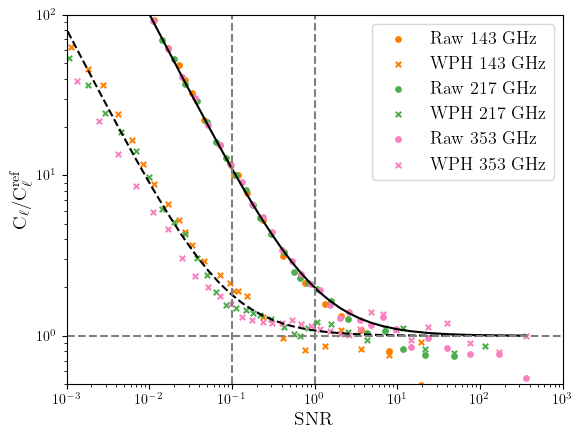

In [109]:
fontsize = 14
s = 15

plt.figure()

alpha = 0.08
plt.plot(SNR_353,1+1/SNR_353,color='black',ls='-')
plt.plot(SNR_353,1+alpha/SNR_353,color='black',ls='--')

plt.scatter(SNR_143,PS_raw_U[0]/PS_ref_143,label=r'$\rm{Raw \ 143 \ GHz}$',color=color[1],marker='o',s=s)
plt.scatter(SNR_143,mean_U[0]/PS_ref_143,label=r'$\rm{WPH \ 143 \ GHz}$',color=color[1],marker='x',s=s)

plt.scatter(SNR_217,PS_raw_U[1]/PS_ref_217,label=r'$\rm{Raw \ 217 \ GHz}$',color=color[2],marker='o',s=s)
plt.scatter(SNR_217,mean_U[1]/PS_ref_217,label=r'$\rm{WPH \ 217 \ GHz}$',color=color[2],marker='x',s=s)

plt.scatter(SNR_353,PS_raw_U[2]/PS_ref_353,label=r'$\rm{Raw \ 353 \ GHz}$',color=color[3],marker='o',s=s)
plt.scatter(SNR_353,mean_U[2]/PS_ref_353,label=r'$\rm{WPH \ 353 \ GHz}$',color=color[3],marker='x',s=s)

plt.legend(fontsize=fontsize-1)
plt.ylabel(r'$\rm{C_\ell / C_\ell^{ref}}$',fontsize=fontsize)
plt.xlabel(r'$\rm{SNR}$',fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.axhline(1,color='grey',ls='--')
plt.axvline(1,color='grey',ls='--')
plt.axvline(0.1,color='grey',ls='--')
plt.xlim(1e-3,1e3)
plt.ylim(0.5,1e2)

#plt.savefig('Fig3bis_PS_U_maps_SNR.pdf',bbox_inches='tight')

# Astrophysical validation

## S, p, psi

In [7]:
def find_lag_vectors(reso,delta,plot_positions=False):
    pixel_delta = delta/reso
    range = 4*int(pixel_delta)+1
    center = int(range/2)
    xx, yy = np.meshgrid(np.arange(-center,center+1),np.arange(-center,center+1),indexing='ij')
    positions = np.where(np.logical_and(xx**2+yy**2<=(3*pixel_delta/2)**2,xx**2+yy**2>=(pixel_delta/2)**2),1,0)
    if plot_positions:
        plot(positions)
    mask = np.where(positions.flatten()==1)
    lags = np.swapaxes(np.array([xx.flatten()[mask],yy.flatten()[mask]]),1,0)
    return lags
    
def S_p_maps(I,Q,U,reso,delta):
    p = np.sqrt(Q**2+U**2)/I
    lags = find_lag_vectors(reso,delta)
    summed_map = np.zeros(np.shape(Q))
    for i in range(len(lags)):
        summed_map = summed_map + (0.5*np.arctan2(U*np.roll(np.roll(Q,lags[i][0],axis=0),lags[i][1],axis=1)-Q*np.roll(np.roll(U,lags[i][0],axis=0),lags[i][1],axis=1),Q*np.roll(np.roll(Q,lags[i][0],axis=0),lags[i][1],axis=1)+U*np.roll(np.roll(U,lags[i][0],axis=0),lags[i][1],axis=1)))**2
    S_map = np.sqrt(summed_map/len(lags))/np.pi*180
    border = np.max(lags)
    return S_map[border:-border,border:-border], p[border:-border,border:-border]

def func(x, mu, sigma, amp):
        y = amp * np.exp( -((x - mu)/sigma)**2)
        return y
    
def mu_sigma(x,y):
    guess = [(x[0]+x[-1])/2, (x[-1]-x[0])*2, np.max(y)]
    popt, pcov = curve_fit(func, x, y, p0=guess)
    mu, sigma, amp = popt
    return mu, sigma, amp
    
def plot_Svp(I_obs,Q_obs,U_obs,I_sep,Q_sep,U_sep,fwhm,delta=10,reso=2.35,bins_std=[10,20,30,40,50,60,70,80,90]):
    beam_I_obs = I_obs #beam(I_obs,fwhm,reso=reso)
    beam_Q_obs = Q_obs #beam(Q_obs,fwhm,reso=reso)
    beam_U_obs = U_obs #beam(U_obs,fwhm,reso=reso)
    beam_I_sep = I_sep #beam(I_sep,fwhm,reso=reso)
    beam_Q_sep = Q_sep #beam(Q_sep,fwhm,reso=reso)
    beam_U_sep = U_sep #beam(U_sep,fwhm,reso=reso)
    model = Sxp(delta,fwhm)
    S_obs, p_obs = S_p_maps(beam_I_obs,beam_Q_obs,beam_U_obs,reso=reso,delta=delta)
    S_sep, p_sep = S_p_maps(beam_I_sep,beam_Q_sep,beam_U_sep,reso=reso,delta=delta)
    fontsize = 12
    n_bin_S = 100
    n_bin_p = 100
    S_min = 0.5
    S_max = 130
    p_min = 0.05
    p_max = 100
    S_edges = np.logspace(np.log10(S_min),np.log10(S_max),num=n_bin_S+1)
    p_edges = np.logspace(np.log10(p_min),np.log10(p_max),num=n_bin_p+1)
    S_obs_values = S_obs.flatten()
    p_obs_values = p_obs.flatten()
    S_sep_values = S_sep.flatten()
    p_sep_values = p_sep.flatten()
    mesh_obs = np.zeros((n_bin_S,n_bin_p))
    mesh_sep = np.zeros((n_bin_S,n_bin_p))
    for i in range(len(S_obs_values)):
        S_obs_i = S_obs_values[i]
        p_obs_i = p_obs_values[i]
        S_sep_i = S_sep_values[i]
        p_sep_i = p_sep_values[i]
        if S_obs_i >= S_edges[0] and S_obs_i < S_edges[-1] and p_obs_i >= p_edges[0] and p_obs_i < p_edges[-1]:
            S_obs_ind = np.min(np.where(S_edges > S_obs_i))-1
            p_obs_ind = np.min(np.where(p_edges > p_obs_i))-1
            mesh_obs[S_obs_ind,p_obs_ind] += 1
        if S_sep_i >= S_edges[0] and S_sep_i < S_edges[-1] and p_sep_i >= p_edges[0] and p_sep_i < p_edges[-1]:
            S_sep_ind = np.min(np.where(S_edges > S_sep_i))-1
            p_sep_ind = np.min(np.where(p_edges > p_sep_i))-1
            mesh_sep[S_sep_ind,p_sep_ind] += 1
    bins_std = np.array(bins_std)
    p_centers = (p_edges[:-1]+p_edges[1:])/2
    S_centers = (S_edges[:-1]+S_edges[1:])/2
    p_bins = p_centers[bins_std]
    mu_obs = np.average(np.tile(S_centers,(len(bins_std),1)),weights=np.swapaxes(mesh_obs[:,bins_std],1,0),axis=-1)
    sigma_obs = np.sqrt(np.average(np.tile(S_centers,(len(bins_std),1))**2,weights=np.swapaxes(mesh_obs[:,bins_std],1,0),axis=-1) - np.average(np.tile(S_centers,(len(bins_std),1)),weights=np.swapaxes(mesh_obs[:,bins_std],1,0),axis=-1)**2)
    mu_sep = np.average(np.tile(S_centers,(len(bins_std),1)),weights=np.swapaxes(mesh_sep[:,bins_std],1,0),axis=-1)
    sigma_sep = np.sqrt(np.average(np.tile(S_centers,(len(bins_std),1))**2,weights=np.swapaxes(mesh_sep[:,bins_std],1,0),axis=-1) - np.average(np.tile(S_centers,(len(bins_std),1)),weights=np.swapaxes(mesh_sep[:,bins_std],1,0),axis=-1)**2)
    vmin = 1
    vmax = max(np.max(mesh_obs),np.max(mesh_sep))
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    A = ax[0].pcolormesh(p_edges,S_edges,mesh_obs,norm='log',cmap='jet',alpha=0.6,vmin=vmin,vmax=vmax)
    ax[0].plot(p_edges,100*model/p_edges,label=r'$\rm{Planck \ model}$',color='black')
    ax[0].errorbar(p_bins,mu_obs,yerr=sigma_obs,fmt='o',color='black',capsize=4)
    ax[0].set_ylabel(r'$\rm{S \ [ deg ]}$',fontsize=fontsize)
    ax[0].set_xlabel(r'$\rm{p \ [ \% ]}$',fontsize=fontsize)
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlim(p_min,p_max)
    ax[0].set_ylim(S_min,S_max)
    ax[0].legend(loc=3,bbox_to_anchor=(0.005,0.005),fontsize=fontsize)
    ax[0].set_title(r'$\rm{Raw \ dust}$',fontsize=fontsize+5)
    ax[0].text(p_centers[42],S_centers[3],r'$\rm{fwhm='+str(fwhm)+'^\prime}$')
    ax[0].text(p_centers[42],S_centers[7],r'$\rm{\delta='+str(delta)+'^\prime}$')
    B = ax[1].pcolormesh(p_edges,S_edges,mesh_sep,norm='log',cmap='jet',alpha=0.6,vmin=vmin,vmax=vmax)
    ax[1].plot(p_edges,100*model/p_edges,label=r'$\rm{Planck \ model}$',color='black')
    ax[1].errorbar(p_bins,mu_sep,yerr=sigma_sep,fmt='o',color='black',capsize=4)
    ax[1].set_ylabel(r'$\rm{S \ [ deg ]}$',fontsize=fontsize)
    ax[1].set_xlabel(r'$\rm{p \ [ \% ]}$',fontsize=fontsize)
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xlim(p_min,p_max)
    ax[1].set_ylim(S_min,S_max)
    ax[1].legend(loc=3,bbox_to_anchor=(0.005,0.005),fontsize=fontsize)
    ax[1].set_title(r'$\rm{Separated \ dust}$',fontsize=fontsize+5)
    ax[1].text(p_centers[42],S_centers[3],r'$\rm{fwhm='+str(fwhm)+'^\prime}$')
    ax[1].text(p_centers[42],S_centers[7],r'$\rm{\delta='+str(delta)+'^\prime}$')
    axins1 = inset_axes(ax[0],
                   width="7%", 
                   height="300%",
                   loc='lower left',
                   bbox_to_anchor=(0.06, 0.15, 0.5, 0.1),
                   bbox_transform=ax[0].transAxes,
                   borderpad=0,
                   )
    axins2 = inset_axes(ax[1],
                   width="7%", 
                   height="300%",
                   loc='lower left',
                   bbox_to_anchor=(0.06, 0.15, 0.5, 0.1),
                   bbox_transform=ax[1].transAxes,
                   borderpad=0,
                   )
    cb1=plt.colorbar(A,cax=axins1,ax=None,orientation='vertical',ticks=[1, 10, 100, 1000])
    cb1.set_label(r'$\rm{counts}$',rotation=90,fontsize=10,labelpad=-48)
    cb1.ax.set_yticklabels(['1','10','100','1000']) 
    cb2=plt.colorbar(B,cax=axins2,ax=None,orientation='vertical',ticks=[1, 10, 100, 1000])
    cb2.set_label(r'$\rm{counts}$',rotation=90,fontsize=10,labelpad=-48)
    cb2.ax.set_yticklabels(['1','10','100','1000']) 
    plt.show()
    return 

def compute_mean_Sxp(I,Q,U,reso,delta):
    S, p = S_p_maps(I,Q,U,reso,delta)
    Sxp = S*p
    return np.mean(Sxp)

def beam(x,fwhm_arcmin,reso=2.35):
    sigma_arcmin = fwhm_arcmin / 2.355
    sigma_pixel = sigma_arcmin / reso
    gauss_map = np.array(Gaussian2DKernel(sigma_pixel,x_size=np.shape(x)[-2],y_size=np.shape(x)[-1]))
    modulus_gauss = np.abs(np.fft.fft2(gauss_map))
    x_fft = np.fft.fft2(x)
    x_beam_fft = x_fft*modulus_gauss
    x_beam = np.fft.ifft2(x_beam_fft)
    return np.real(x_beam)

In [8]:
def compute_psi(Q,U):
    return 0.5*np.arctan2(-U,Q)
    
def compute_sigma_psi(noise_Q,noise_U):
    return np.std(compute_psi(noise_Q,noise_U),axis=0)

def compute_p(I_0,Q,U):
    return np.sqrt(Q**2+U**2)/I_0

def compute_pMAS(p,b):
    return p - b**2 * (1 - np.exp(-p**2/b**2)) / (2*p)

def compute_b(sigma_prime_Q,sigma_prime_U,psi,I_0,theta):
    return np.sqrt((sigma_prime_U**2 * np.cos(2 * psi - theta)**2 + sigma_prime_Q**2 * np.sin(2 * psi - theta)**2) / I_0**2)

def compute_rho(sigma_Q,sigma_U,sigma_QU):
    return sigma_QU / (sigma_Q * sigma_U)

def compute_theta(rho,sigma_Q,sigma_U):
    return 0.5 * np.arctan2(2 * rho * sigma_Q * sigma_U, sigma_Q**2 - sigma_U**2)

def compute_sigma_prime_Q(sigma_Q,sigma_U,theta,rho):
    return np.sqrt(sigma_Q**2 * np.cos(theta)**2 + sigma_U**2 * np.sin(theta)**2 + rho * sigma_Q * sigma_U * np.sin(2 * theta))

def compute_sigma_prime_U(sigma_Q,sigma_U,theta,rho):
    return np.sqrt(sigma_Q**2 * np.sin(theta)**2 + sigma_U**2 * np.cos(theta)**2 - rho * sigma_Q * sigma_U * np.sin(2 * theta))

def compute_sigma_Q(noise_Q):
    mean_Q = np.mean(noise_Q,axis=0)
    return np.sqrt(np.mean((noise_Q-mean_Q)**2,axis=0))

def compute_sigma_U(noise_U):
    mean_U = np.mean(noise_U,axis=0)
    return np.sqrt(np.mean((noise_U-mean_U)**2,axis=0))

def compute_sigma_QU(noise_Q,noise_U):
    mean_Q = np.mean(noise_Q,axis=0)
    mean_U = np.mean(noise_U,axis=0)
    return np.mean((noise_Q-mean_Q)*(noise_U-mean_U),axis=0)

def pMAS(I,Q,U,noise_Q,noise_U):
    sigma_Q = compute_sigma_Q(noise_Q)
    sigma_U = compute_sigma_U(noise_U)
    sigma_QU = compute_sigma_QU(noise_Q,noise_U)
    p = compute_p(I,Q,U)
    psi = compute_psi(Q,U)
    rho = compute_rho(sigma_Q,sigma_U,sigma_QU)
    theta = compute_theta(rho,sigma_Q,sigma_U)
    sigma_prime_Q = compute_sigma_prime_Q(sigma_Q,sigma_U,theta,rho)
    sigma_prime_U = compute_sigma_prime_U(sigma_Q,sigma_U,theta,rho)
    b = compute_b(sigma_prime_Q,sigma_prime_U,psi,I,theta)
    pMAS = compute_pMAS(p,b)
    return pMAS

def compute_S(Q,U,reso,delta):
    lags = find_lag_vectors(reso,delta)
    border = np.max(lags)
    N = len(lags)
    # compute psi in rad
    psi = compute_psi(Q,U)
    # compute S in rad
    summed_map = np.zeros(np.shape(Q))
    for i in range(N):
        summed_map = summed_map + (np.roll(np.roll(psi,lags[i][0],axis=0),lags[i][1],axis=1) - psi)**2
    S_map = np.sqrt(summed_map/N)
    return S_map[border:-border,border:-border]/np.pi*180

def compute_sigma_psi(noise_Q,noise_U):
    return np.std(compute_psi(noise_Q,noise_U),axis=0)

def compute_S_db(Q,U,noise_Q,noise_U,reso,delta):
    lags = find_lag_vectors(reso,delta)
    border = np.max(lags)
    N = len(lags)
    # compute psi in rad
    psi = compute_psi(Q,U)
    # compute S in rad
    summed_map = np.zeros(np.shape(Q))
    for i in range(N):
        summed_map = summed_map + (np.roll(np.roll(psi,lags[i][0],axis=0),lags[i][1],axis=1) - psi)**2
    S_map = np.sqrt(summed_map/N)
    # compute psi in rad
    psi = compute_psi(Q,U)
    # compute sigma_psi in rad
    sigma_psi = compute_sigma_psi(noise_Q,noise_U)
    # compute sigma_S in rad
    sigma_summed_map_1 = np.zeros(np.shape(Q))
    sigma_summed_map_2 = np.zeros(np.shape(Q))
    for i in range(N):
        sigma_summed_map_1 = sigma_summed_map_1 + (np.roll(np.roll(psi,lags[i][0],axis=0),lags[i][1],axis=1) - psi)
        sigma_summed_map_2 = sigma_summed_map_2 + np.roll(np.roll(sigma_psi**2,lags[i][0],axis=0),lags[i][1],axis=1) * (np.roll(np.roll(psi,lags[i][0],axis=0),lags[i][1],axis=1) - psi)**2
    sigma_S_2 = sigma_psi**2 * sigma_summed_map_1**2 / (N**2 * S_map**2) + sigma_summed_map_2 / (N**2 * S_map**2)
    S_db = np.where(S_map > np.sqrt(sigma_S_2),np.sqrt(S_map**2 - sigma_S_2),0)
    return S_db[border:-border,border:-border]/np.pi*180, border

def debiased_raw_Sxp(I,Q,U,noise_Q,noise_U,fwhm,delta,reso=2.35):
    beam_I = beam(I,fwhm)
    beam_Q = beam(Q,fwhm)
    beam_U = beam(U,fwhm)
    beam_noise_Q = beam(noise_Q,fwhm)
    beam_noise_U = beam(noise_U,fwhm)
    SNR_Q = np.sqrt(np.std(beam_Q)**2 - np.std(beam_noise_Q)**2) / np.std(beam_noise_Q)
    SNR_U = np.sqrt(np.std(beam_U)**2 - np.std(beam_noise_U)**2) / np.std(beam_noise_U)
    if min(SNR_Q,SNR_U) < 3:
        print('The SNR is not sufficient to apply the debiasing method !')
        return np.nan
    p_MAS = pMAS(beam_I,beam_Q,beam_U,beam_noise_Q,beam_noise_U)
    S_db, border = compute_S_db(beam_Q,beam_U,beam_noise_Q,beam_noise_U,reso,delta)
    Sxp = p_MAS[border:-border,border:-border] * S_db
    flatten_Sxp = Sxp.flatten()
    mask = np.where(flatten_Sxp>0)
    return np.mean(flatten_Sxp[mask])

In [9]:
a = 64
reso = 2.35
fwhms_arcmin = np.array([5,np.sqrt(50),10,np.sqrt(200),20,np.sqrt(800),40,np.sqrt(3200),80,np.sqrt(12800),160])
deltas_arcmin = fwhms_arcmin / 2
fwhms_pixel = fwhms_arcmin / reso

I_353 = np.load(data_folder+'Sroll20_I_353_FM_768px.npy')[2*a:-2*a,2*a:-2*a] - 450 + 27
Q_353 = after_sep[0,3][a:-a,a:-a]
U_353 = after_sep[1,3][a:-a,a:-a]
Q_217 = after_sep[0,2][a:-a,a:-a]*from_217_to_353
U_217 = after_sep[1,2][a:-a,a:-a]*from_217_to_353
Q_143 = after_sep[0,1][a:-a,a:-a]*from_143_to_353
U_143 = after_sep[1,1][a:-a,a:-a]*from_143_to_353

Q_353_raw = before_sep[0,3][a:-a,a:-a]
U_353_raw = before_sep[1,3][a:-a,a:-a]
Q_217_raw = before_sep[0,2][a:-a,a:-a]*from_217_to_353
U_217_raw = before_sep[1,2][a:-a,a:-a]*from_217_to_353
Q_143_raw = before_sep[0,1][a:-a,a:-a]*from_143_to_353
U_143_raw = before_sep[1,1][a:-a,a:-a]*from_143_to_353

noise_Q_143 = np.load(data_folder+'Sroll20_Noise_Q_143_maps.npy')[0,:,2*a:-2*a,2*a:-2*a]*from_143_to_353
noise_U_143 = np.load(data_folder+'Sroll20_Noise_U_143_maps.npy')[0,:,2*a:-2*a,2*a:-2*a]*from_143_to_353
noise_Q_217 = np.load(data_folder+'Sroll20_Noise_Q_217_maps.npy')[0,:,2*a:-2*a,2*a:-2*a]*from_217_to_353
noise_U_217 = np.load(data_folder+'Sroll20_Noise_U_217_maps.npy')[0,:,2*a:-2*a,2*a:-2*a]*from_217_to_353
noise_Q_353 = np.load(data_folder+'Sroll20_Noise_Q_353_maps.npy')[0,:,2*a:-2*a,2*a:-2*a]
noise_U_353 = np.load(data_folder+'Sroll20_Noise_U_353_maps.npy')[0,:,2*a:-2*a,2*a:-2*a]

#Van_I = np.load('/home/auclair/Thèse_LPENS/Informatique/Data/TE correlation/Vansyngel/Vansyngel_I_768px.npy')[128:-128,128:-128].astype(np.float64)
#Van_Q = np.load('/home/auclair/Thèse_LPENS/Informatique/Data/TE correlation/Vansyngel/Vansyngel_Q_768px.npy')[128:-128,128:-128].astype(np.float64)
#Van_Q = Van_Q - np.mean(Van_Q) + np.mean(Q_353)
#Van_U = np.load('/home/auclair/Thèse_LPENS/Informatique/Data/TE correlation/Vansyngel/Vansyngel_U_768px.npy')[128:-128,128:-128].astype(np.float64)
#Van_U = Van_U - np.mean(Van_U) + np.mean(U_353)

In [10]:
QU_syn_143 = np.load(data_folder+'50_QU_synthesis_143_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)
QU_syn_217 = np.load(data_folder+'50_QU_synthesis_217_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)
QU_syn_353 = np.load(data_folder+'50_QU_synthesis_353_overI.npy')[:,:,a:-a,a:-a].astype(np.float64)

In [14]:
IQU_syn_143 = np.concatenate((np.array([[I_353]]*np.shape(QU_syn_143)[0]),QU_syn_143),axis=1)
IQU_syn_217 = np.concatenate((np.array([[I_353]]*np.shape(QU_syn_217)[0]),QU_syn_217),axis=1)
IQU_syn_353 = np.concatenate((np.array([[I_353]]*np.shape(QU_syn_353)[0]),QU_syn_353),axis=1)

In [15]:
def Sxp(fwhm,f_M=0.9,alpha_M=-2.5,N=7,p_max=0.26):
    return 0.164*f_M*(fwhm/160)**(-1-alpha_M/2)*p_max/np.sqrt(6*N)/np.pi*180

In [13]:
n_freq = 3
n_syn = 20
n_fwhms = len(fwhms_arcmin)
mean_Sxp = np.zeros((n_fwhms,n_freq))
raw_mean_Sxp = np.zeros((n_fwhms,n_freq))
#Van_mean_Sxp = np.zeros((n_fwhms))
mean_syn_Sxp = np.zeros((n_syn,n_fwhms,n_freq))
Sxp_model = np.zeros(n_fwhms)

for fwhm in range(n_fwhms):
    print('FWHM =',fwhms_arcmin[fwhm])
    Sxp_model[fwhm] = Sxp(fwhms_arcmin[fwhm],alpha_M=-2.36)
    print('Planck model computed !')
    mean_Sxp[fwhm,0] = compute_mean_Sxp(beam(I_353,fwhms_arcmin[fwhm]),beam(Q_143,fwhms_arcmin[fwhm]),beam(U_143,fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
    mean_Sxp[fwhm,1] = compute_mean_Sxp(beam(I_353,fwhms_arcmin[fwhm]),beam(Q_217,fwhms_arcmin[fwhm]),beam(U_217,fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
    mean_Sxp[fwhm,2] = compute_mean_Sxp(beam(I_353,fwhms_arcmin[fwhm]),beam(Q_353,fwhms_arcmin[fwhm]),beam(U_353,fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
    print('Separated S x p computed !')
    raw_mean_Sxp[fwhm,0] = compute_mean_Sxp(beam(I_353,fwhms_arcmin[fwhm]),beam(Q_143_raw,fwhms_arcmin[fwhm]),beam(U_143_raw,fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
    raw_mean_Sxp[fwhm,1] = compute_mean_Sxp(beam(I_353,fwhms_arcmin[fwhm]),beam(Q_217_raw,fwhms_arcmin[fwhm]),beam(U_217_raw,fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
    raw_mean_Sxp[fwhm,2] = compute_mean_Sxp(beam(I_353,fwhms_arcmin[fwhm]),beam(Q_353_raw,fwhms_arcmin[fwhm]),beam(U_353_raw,fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
    print('Raw S x p computed !')
    #Van_mean_Sxp[fwhm] = compute_mean_Sxp(beam(I_353,fwhms_arcmin[fwhm]),beam(Van_Q,fwhms_arcmin[fwhm]),beam(Van_U,fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
    #print('Vansyngel S x p computed !')
    for syn in range(n_syn):
        mean_syn_Sxp[syn,fwhm,0] = compute_mean_Sxp(beam(IQU_syn_143[1+syn,0],fwhms_arcmin[fwhm]),beam(IQU_syn_143[1+syn,1],fwhms_arcmin[fwhm]),beam(IQU_syn_143[1+syn,2],fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
        mean_syn_Sxp[syn,fwhm,1] = compute_mean_Sxp(beam(IQU_syn_217[1+syn,0],fwhms_arcmin[fwhm]),beam(IQU_syn_217[1+syn,1],fwhms_arcmin[fwhm]),beam(IQU_syn_217[1+syn,2],fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
        mean_syn_Sxp[syn,fwhm,2] = compute_mean_Sxp(beam(IQU_syn_353[1+syn,0],fwhms_arcmin[fwhm]),beam(IQU_syn_353[1+syn,1],fwhms_arcmin[fwhm]),beam(IQU_syn_353[1+syn,2],fwhms_arcmin[fwhm]),reso,deltas_arcmin[fwhm])
    print('Modeled S x p computed !')

FWHM = 5.0
Planck model computed !
Separated S x p computed !
Raw S x p computed !
Modeled S x p computed !
FWHM = 7.0710678118654755
Planck model computed !
Separated S x p computed !
Raw S x p computed !
Modeled S x p computed !
FWHM = 10.0
Planck model computed !
Separated S x p computed !
Raw S x p computed !
Modeled S x p computed !
FWHM = 14.142135623730951
Planck model computed !
Separated S x p computed !
Raw S x p computed !
Modeled S x p computed !
FWHM = 20.0
Planck model computed !
Separated S x p computed !
Raw S x p computed !
Modeled S x p computed !
FWHM = 28.284271247461902
Planck model computed !
Separated S x p computed !
Raw S x p computed !
Modeled S x p computed !
FWHM = 40.0
Planck model computed !
Separated S x p computed !
Raw S x p computed !
Modeled S x p computed !
FWHM = 56.568542494923804
Planck model computed !
Separated S x p computed !
Raw S x p computed !
Modeled S x p computed !
FWHM = 80.0
Planck model computed !
Separated S x p computed !
Raw S x p 

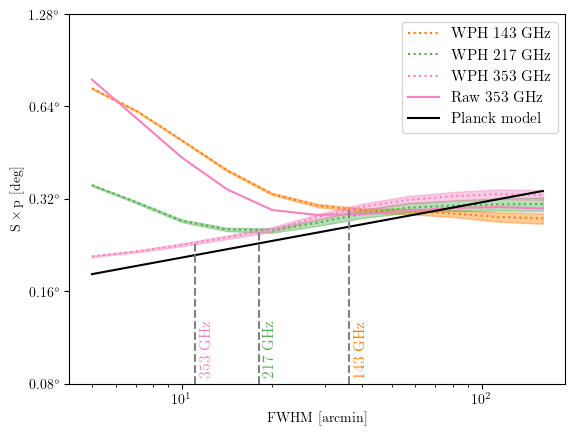

In [14]:
fontsize = 15

plt.figure()
plt.loglog()

#plt.plot(fwhms_arcmin,raw_mean_Sxp[:,0],label=r'$\rm{d_{143}}$',color=color[1],linestyle='-')
#plt.plot(fwhms_arcmin,mean_Sxp[:,0],label=r'$\rm{\tilde{s}_{143}}$',color=color[0],linestyle='--')
plt.plot(fwhms_arcmin,np.mean(mean_syn_Sxp[:,:,0],axis=0),label=r'$\rm{WPH \ 143 \ GHz}$',color=color[1],linestyle='dotted')
plt.fill_between(fwhms_arcmin,np.mean(mean_syn_Sxp[:,:,0],axis=0)-np.std(mean_syn_Sxp[:,:,0],axis=0),np.mean(mean_syn_Sxp[:,:,0],axis=0)+np.std(mean_syn_Sxp[:,:,0],axis=0),color=color[1],alpha=0.4)

#plt.plot(fwhms_arcmin,raw_mean_Sxp[:,1],label=r'$\rm{d_{217}}$',color=color[2],linestyle='-')
#plt.plot(fwhms_arcmin,mean_Sxp[:,1],label=r'$\rm{\tilde{s}_{217}}$',color=color[1],linestyle='--')
plt.plot(fwhms_arcmin,np.mean(mean_syn_Sxp[:,:,1],axis=0),label=r'$\rm{WPH \ 217 \ GHz}$',color=color[2],linestyle='dotted')
plt.fill_between(fwhms_arcmin,np.mean(mean_syn_Sxp[:,:,1],axis=0)-np.std(mean_syn_Sxp[:,:,1],axis=0),np.mean(mean_syn_Sxp[:,:,1],axis=0)+np.std(mean_syn_Sxp[:,:,1],axis=0),color=color[2],alpha=0.4)

#plt.plot(fwhms_arcmin,mean_Sxp[:,2],label=r'$\rm{\tilde{s}_{353}}$',color=color[2],linestyle='--')
plt.plot(fwhms_arcmin,np.mean(mean_syn_Sxp[:,:,2],axis=0),label=r'$\rm{WPH \ 353 \ GHz}$',color=color[3],linestyle='dotted')
plt.fill_between(fwhms_arcmin,np.mean(mean_syn_Sxp[:,:,2],axis=0)-np.std(mean_syn_Sxp[:,:,2],axis=0),np.mean(mean_syn_Sxp[:,:,2],axis=0)+np.std(mean_syn_Sxp[:,:,2],axis=0),color=color[3],alpha=0.4)
plt.plot(fwhms_arcmin,raw_mean_Sxp[:,2],label=r'$\rm{Raw \ 353 \ GHz}$',color=color[3],linestyle='-')

plt.plot(fwhms_arcmin,Sxp_model,label=r'$\rm{Planck \ model}$',color='black')
#plt.plot(fwhms_arcmin,Van_mean_Sxp,label=r'$\rm{Vansyngel}$',color=color[3])

plt.axvline(11,0,0.38,ls='--',color='grey')
plt.text(11.5,0.085,r'$\rm{353 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[3])
plt.axvline(18,0,0.41,ls='--',color='grey')
plt.text(18.75,0.085,r'$\rm{217 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[2])
plt.axvline(36,0,0.47,ls='--',color='grey')
plt.text(37.5,0.085,r'$\rm{143 \ GHz}$',fontsize=fontsize-4,rotation='vertical',color=color[1])

plt.legend(fontsize=11)
plt.yticks(ticks=[0.08,0.16,0.32,0.64,1.28],labels=[r'$\rm{0.08^\circ}$',r'$\rm{0.16^\circ}$',r'$\rm{0.32^\circ}$',r'$\rm{0.64^\circ}$',r'$\rm{1.28^\circ}$'])
plt.yticks(ticks=[],labels=[],minor=True)
plt.ylabel(r'$\rm{S \times p \ [deg]}$')
plt.xlabel(r'$\rm{FWHM \ [arcmin]}$')

#plt.savefig('Fig9_Sxp.pdf',bbox_inches='tight')

## Polarization histograms

In [11]:
n_syn = 50
bins = 100
range_bins = (-0.2,0.25)
density = True
fwhms = [11,18,36]
mask = np.zeros((512,512)) + 1
mask[450:,:150] = 0
mask = mask.flatten()

# At 353 GHz scale
fwhm = fwhms[0]
    # Raw data 353
hist_sep_Q_353_353, _ = np.histogram((beam(Q_353,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_353,fwhm)**2+beam(U_353,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_sep_U_353_353, _ = np.histogram((beam(U_353,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_353,fwhm)**2+beam(U_353,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_raw_Q_353_353, _ = np.histogram((beam(Q_353_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_353_raw,fwhm)**2+beam(U_353_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_raw_U_353_353, bin_edges = np.histogram((beam(U_353_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_353_raw,fwhm)**2+beam(U_353_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    # Vansyngel
#hist_van_Q_353, _ = np.histogram((beam(Van_Q,fwhm)/(beam(Van_I,fwhm)+np.sqrt(beam(Van_Q,fwhm)**2+beam(Van_U,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_van_Q_353, _ = np.histogram((beam(Van_Q,fwhm)/beam(Van_I,fwhm)).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_van_U_353, _ = np.histogram((beam(Van_U,fwhm)/(beam(Van_I,fwhm)+np.sqrt(beam(Van_Q,fwhm)**2+beam(Van_U,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
    # WPH 353
hists_Q_353 = np.zeros((n_syn,bins))
hists_U_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_Q_353[i], _ = np.histogram((beam(QU_syn_353[i+1,0],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_353[i+1,0],fwhm)**2+beam(QU_syn_353[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
    hists_U_353[i], _ = np.histogram((beam(QU_syn_353[i+1,1],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_353[i+1,0],fwhm)**2+beam(QU_syn_353[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
mean_hist_Q_353_353 = np.mean(hists_Q_353,axis=0)
std_hist_Q_353_353 = np.std(hists_Q_353,axis=0)
mean_hist_U_353_353 = np.mean(hists_U_353,axis=0)
std_hist_U_353_353 = np.std(hists_U_353,axis=0)

# At 217 GHz scale
fwhm = fwhms[1]
    # Raw data 353
hist_raw_Q_353_217, _ = np.histogram((beam(Q_353_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_353_raw,fwhm)**2+beam(U_353_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_raw_U_353_217, bin_edges = np.histogram((beam(U_353_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_353_raw,fwhm)**2+beam(U_353_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    # Raw data 217
hist_raw_Q_217_217, _ = np.histogram((beam(Q_217_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_217_raw,fwhm)**2+beam(U_217_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_raw_U_217_217, bin_edges = np.histogram((beam(U_217_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_217_raw,fwhm)**2+beam(U_217_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    # Vansyngel
hist_van_Q_217, _ = np.histogram((beam(Van_Q,fwhm)/(beam(Van_I,fwhm)+np.sqrt(beam(Van_Q,fwhm)**2+beam(Van_U,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_van_U_217, _ = np.histogram((beam(Van_U,fwhm)/(beam(Van_I,fwhm)+np.sqrt(beam(Van_Q,fwhm)**2+beam(Van_U,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
    # WPH 353
hists_Q_353 = np.zeros((n_syn,bins))
hists_U_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_Q_353[i], _ = np.histogram((beam(QU_syn_353[i+1,0],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_353[i+1,0],fwhm)**2+beam(QU_syn_353[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
    hists_U_353[i], _ = np.histogram((beam(QU_syn_353[i+1,1],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_353[i+1,0],fwhm)**2+beam(QU_syn_353[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
mean_hist_Q_353_217 = np.mean(hists_Q_353,axis=0)
std_hist_Q_353_217 = np.std(hists_Q_353,axis=0)
mean_hist_U_353_217 = np.mean(hists_U_353,axis=0)
std_hist_U_353_217 = np.std(hists_U_353,axis=0)
    # WPH 217
hists_Q_217 = np.zeros((n_syn,bins))
hists_U_217 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_Q_217[i], _ = np.histogram((beam(QU_syn_217[i+1,0],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_217[i+1,0],fwhm)**2+beam(QU_syn_217[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
    hists_U_217[i], _ = np.histogram((beam(QU_syn_217[i+1,1],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_217[i+1,0],fwhm)**2+beam(QU_syn_217[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
mean_hist_Q_217_217 = np.mean(hists_Q_217,axis=0)
std_hist_Q_217_217 = np.std(hists_Q_217,axis=0)
mean_hist_U_217_217 = np.mean(hists_U_217,axis=0)
std_hist_U_217_217 = np.std(hists_U_217,axis=0)

# At 143 GHz scale
fwhm = fwhms[2]
    # Raw data 353
hist_raw_Q_353_143, _ = np.histogram((beam(Q_353_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_353_raw,fwhm)**2+beam(U_353_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_raw_U_353_143, bin_edges = np.histogram((beam(U_353_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_353_raw,fwhm)**2+beam(U_353_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    # Raw data 143
hist_raw_Q_143_143, _ = np.histogram((beam(Q_143_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_143_raw,fwhm)**2+beam(U_143_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_raw_U_143_143, bin_edges = np.histogram((beam(U_143_raw,fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(Q_143_raw,fwhm)**2+beam(U_143_raw,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    # Vansyngel
hist_van_Q_143, _ = np.histogram((beam(Van_Q,fwhm)/(beam(Van_I,fwhm)+np.sqrt(beam(Van_Q,fwhm)**2+beam(Van_U,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
hist_van_U_143, _ = np.histogram((beam(Van_U,fwhm)/(beam(Van_I,fwhm)+np.sqrt(beam(Van_Q,fwhm)**2+beam(Van_U,fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
    # WPH 353
hists_Q_353 = np.zeros((n_syn,bins))
hists_U_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_Q_353[i], _ = np.histogram((beam(QU_syn_353[i+1,0],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_353[i+1,0],fwhm)**2+beam(QU_syn_353[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
    hists_U_353[i], _ = np.histogram((beam(QU_syn_353[i+1,1],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_353[i+1,0],fwhm)**2+beam(QU_syn_353[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
mean_hist_Q_353_143 = np.mean(hists_Q_353,axis=0)
std_hist_Q_353_143 = np.std(hists_Q_353,axis=0)
mean_hist_U_353_143 = np.mean(hists_U_353,axis=0)
std_hist_U_353_143 = np.std(hists_U_353,axis=0)
    # WPH 143
hists_Q_143 = np.zeros((n_syn,bins))
hists_U_143 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_Q_143[i], _ = np.histogram((beam(QU_syn_143[i+1,0],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_143[i+1,0],fwhm)**2+beam(QU_syn_143[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
    hists_U_143[i], _ = np.histogram((beam(QU_syn_143[i+1,1],fwhm)/(beam(I_353,fwhm)+np.sqrt(beam(QU_syn_143[i+1,0],fwhm)**2+beam(QU_syn_143[i+1,1],fwhm)**2))).flatten()[mask==1],bins=bins,range=range_bins,density=density)
mean_hist_Q_143_143 = np.mean(hists_Q_143,axis=0)
std_hist_Q_143_143 = np.std(hists_Q_143,axis=0)
mean_hist_U_143_143 = np.mean(hists_U_143,axis=0)
std_hist_U_143_143 = np.std(hists_U_143,axis=0)

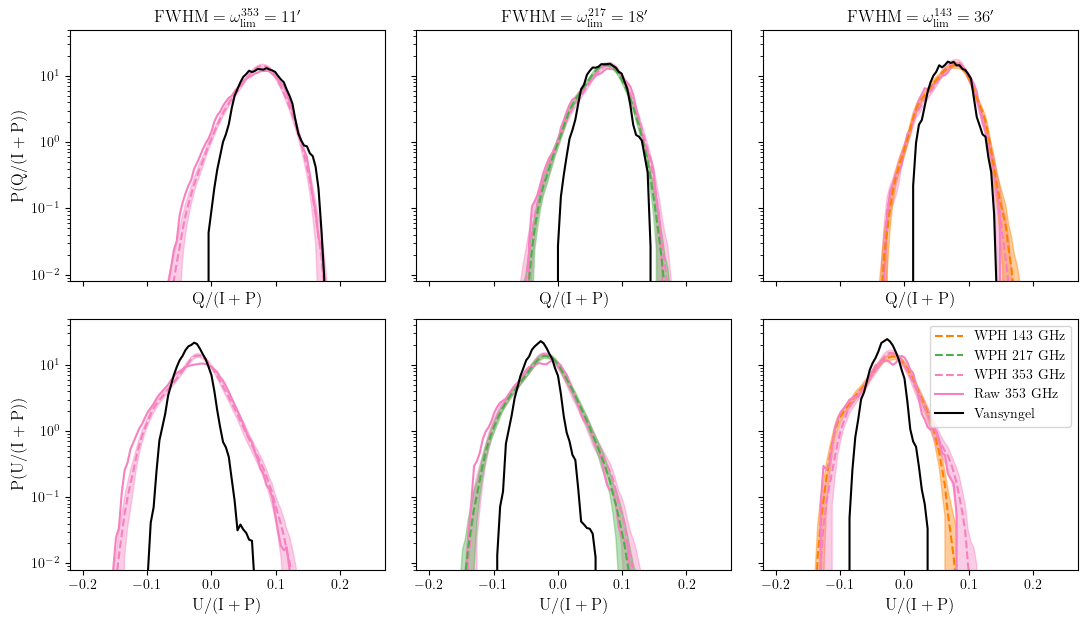

In [15]:
font = 12
ymin = 8*1e-3
ymax = 5*1e1

fig, ax = plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,6))

# 353 Q
ax[0,0].plot(bin_centers,hist_raw_Q_353_353,color=color[3],ls='-')
#ax[0,0].plot(bin_centers,hist_sep_Q_353_353,color=color[3],ls='dotted')
ax[0,0].plot(bin_centers,mean_hist_Q_353_353,color=color[3],ls='--')
ax[0,0].fill_between(bin_centers,mean_hist_Q_353_353-std_hist_Q_353_353,mean_hist_Q_353_353+std_hist_Q_353_353,color=color[3],alpha=0.4)
ax[0,0].plot(bin_centers,hist_van_Q_353,color='black')

ax[0,0].set_title(r'$\rm{FWHM = \omega_{lim}^{353} = 11^\prime}$',loc='center',fontsize=font,pad=5)
ax[0,0].set_yscale('log')
ax[0,0].set_ylim(ymin,ymax)
ax[0,0].set_ylabel(r'$\rm{P(Q/(I+P))}$',fontsize=font)
ax[0,0].set_xlabel(r'$\rm{Q/(I+P)}$',fontsize=font)

# 353 U
ax[1,0].plot(bin_centers,hist_raw_U_353_353,color=color[3],ls='-')
#ax[1,0].plot(bin_centers,hist_sep_U_353_353,color=color[3],ls='dotted')
ax[1,0].plot(bin_centers,mean_hist_U_353_353,color=color[3],ls='--')
ax[1,0].fill_between(bin_centers,mean_hist_U_353_353-std_hist_U_353_353,mean_hist_U_353_353+std_hist_U_353_353,color=color[3],alpha=0.4)
ax[1,0].plot(bin_centers,hist_van_U_353,color='black')

ax[1,0].set_yscale('log')
ax[1,0].set_ylim(ymin,ymax)
ax[1,0].set_ylabel(r'$\rm{P(U/(I+P))}$',fontsize=font)
ax[1,0].set_xlabel(r'$\rm{U/(I+P)}$',fontsize=font)

# 217 Q
ax[0,1].plot(bin_centers,hist_raw_Q_353_217,color=color[3],ls='-')
ax[0,1].plot(bin_centers,mean_hist_Q_353_217,color=color[3],ls='--')
ax[0,1].fill_between(bin_centers,mean_hist_Q_353_217-std_hist_Q_353_217,mean_hist_Q_353_217+std_hist_Q_353_217,color=color[3],alpha=0.4)
#ax[0,1].plot(bin_centers,hist_raw_Q_217_217,color=color[2],ls='-')
ax[0,1].plot(bin_centers,mean_hist_Q_217_217,color=color[2],ls='--')
ax[0,1].fill_between(bin_centers,mean_hist_Q_217_217-std_hist_Q_217_217,mean_hist_Q_217_217+std_hist_Q_217_217,color=color[2],alpha=0.4)
ax[0,1].plot(bin_centers,hist_van_Q_217,color='black')

ax[0,1].set_title(r'$\rm{FWHM = \omega_{lim}^{217} = 18^\prime}$',loc='center',fontsize=font,pad=5)
ax[0,1].set_yscale('log')
ax[0,1].set_ylim(ymin,ymax)
ax[0,1].set_xlabel(r'$\rm{Q/(I+P)}$',fontsize=font)

# 217 U
ax[1,1].plot(bin_centers,hist_raw_U_353_217,color=color[3],ls='-')
ax[1,1].plot(bin_centers,mean_hist_U_353_217,color=color[3],ls='--')
ax[1,1].fill_between(bin_centers,mean_hist_U_353_217-std_hist_U_353_217,mean_hist_U_353_217+std_hist_U_353_217,color=color[3],alpha=0.4)
#ax[1,1].plot(bin_centers,hist_raw_U_217_217,color=color[2],ls='-')
ax[1,1].plot(bin_centers,mean_hist_U_217_217,color=color[2],ls='--')
ax[1,1].fill_between(bin_centers,mean_hist_U_217_217-std_hist_U_217_217,mean_hist_U_217_217+std_hist_U_217_217,color=color[2],alpha=0.4)
ax[1,1].plot(bin_centers,hist_van_U_217,color='black')

ax[1,1].set_yscale('log')
ax[1,1].set_ylim(ymin,ymax)
ax[1,1].set_xlabel(r'$\rm{U/(I+P)}$',fontsize=font)

# 143 Q
ax[0,2].plot(bin_centers,hist_raw_Q_353_143,color=color[3],ls='-')
ax[0,2].plot(bin_centers,mean_hist_Q_353_143,color=color[3],ls='--')
ax[0,2].fill_between(bin_centers,mean_hist_Q_353_143-std_hist_Q_353_143,mean_hist_Q_353_143+std_hist_Q_353_143,color=color[3],alpha=0.4)
#ax[0,2].plot(bin_centers,hist_raw_Q_143_143,color=color[1],ls='-')
ax[0,2].plot(bin_centers,mean_hist_Q_143_143,color=color[1],ls='--')
ax[0,2].fill_between(bin_centers,mean_hist_Q_143_143-std_hist_Q_143_143,mean_hist_Q_143_143+std_hist_Q_143_143,color=color[1],alpha=0.4)
ax[0,2].plot(bin_centers,hist_van_Q_143,color='black')

ax[0,2].set_title(r'$\rm{FWHM = \omega_{lim}^{143} = 36^\prime}$',loc='center',fontsize=font,pad=5)
ax[0,2].set_yscale('log')
ax[0,2].set_ylim(ymin,ymax)
ax[0,2].set_xlabel(r'$\rm{Q/(I+P)}$',fontsize=font)

# 143 U

ax[1,2].plot(bin_centers,mean_hist_U_143_143,color=color[1],label=r'$\rm{WPH \ 143 \ GHz}$',ls='--')
ax[1,2].fill_between(bin_centers,mean_hist_U_143_143-std_hist_U_143_143,mean_hist_U_143_143+std_hist_U_143_143,color=color[1],alpha=0.4)

#ax[1,2].plot(bin_centers,hist_raw_U_143_143*np.nan,color=color[2],label=r'$\rm{Raw \ 217 \ GHz}$',ls='-')
ax[1,2].plot(bin_centers,mean_hist_U_143_143*np.nan,color=color[2],label=r'$\rm{WPH \ 217 \ GHz}$',ls='--')

ax[1,2].plot(bin_centers,mean_hist_U_353_143,color=color[3],label=r'$\rm{WPH \ 353 \ GHz}$',ls='--')
ax[1,2].fill_between(bin_centers,mean_hist_U_353_143-std_hist_U_353_143,mean_hist_U_353_143+std_hist_U_353_143,color=color[3],alpha=0.4)

ax[1,2].plot(bin_centers,hist_raw_U_353_143,color=color[3],label=r'$\rm{Raw \ 353 \ GHz}$',ls='-')
#ax[1,2].plot(bin_centers,hist_sep_U_353_353*np.nan,color=color[3],label=r'$\rm{Sep \ 353 \ GHz}$',ls='dotted')
ax[1,2].plot(bin_centers,hist_van_U_143,color='black',label=r'$\rm{Vansyngel}$')

ax[1,2].legend(fontsize=font-2)
ax[1,2].set_yscale('log')
ax[1,2].set_ylim(ymin,ymax)
ax[1,2].set_xlabel(r'$\rm{U/(I+P)}$',fontsize=font)

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.1,hspace=0.15)

#plt.savefig('Fig5_QUoverIhist_A.pdf',bbox_inches='tight')

In [21]:
n_syn = 50
bins = 100
range_bins = (0,70)
density = True
font = 15
fwhms = [11,18,36]

def compute_S_fwhm(Q,U,fwhm,reso=2.35,delta=fwhm/2):
    lags = find_lag_vectors(reso,delta)
    border = np.max(lags)
    N = len(lags)
    # compute psi in rad
    psi = compute_psi(beam(Q,fwhm),beam(U,fwhm))
    # compute S in rad
    summed_map = np.zeros(np.shape(Q))
    for i in range(N):
        summed_map = summed_map + (np.roll(np.roll(psi,lags[i][0],axis=0),lags[i][1],axis=1) - psi)**2
    S_map = np.sqrt(summed_map/N)
    return S_map[border:-border,border:-border]/np.pi*180
    
# At 353 GHz scale
fwhm = fwhms[0]
    # Raw data 353
hist_sep_S_353_353, bin_edges = np.histogram(compute_S_fwhm(Q_353,U_353,fwhm).flatten(),bins=bins,range=range_bins,density=density)
hist_raw_S_353_353, bin_edges = np.histogram(compute_S_fwhm(Q_353_raw,U_353_raw,fwhm).flatten(),bins=bins,range=range_bins,density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    # WPH 353
hists_S_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_S_353[i], _ = np.histogram(compute_S_fwhm(QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_S_353_353 = np.mean(hists_S_353,axis=0)
std_hist_S_353_353 = np.std(hists_S_353,axis=0)

# At 217 GHz scale
fwhm = fwhms[1]
hist_raw_S_353_217, bin_edges = np.histogram(compute_S_fwhm(Q_353_raw,U_353_raw,fwhm).flatten(),bins=bins,range=range_bins,density=density)
    # WPH 353
hists_S_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_S_353[i], _ = np.histogram(compute_S_fwhm(QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_S_353_217 = np.mean(hists_S_353,axis=0)
std_hist_S_353_217 = np.std(hists_S_353,axis=0)
    # WPH 217
hists_S_217 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_S_217[i], _ = np.histogram(compute_S_fwhm(QU_syn_217[i+1,0],QU_syn_217[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_S_217_217 = np.mean(hists_S_217,axis=0)
std_hist_S_217_217 = np.std(hists_S_217,axis=0)

# At 143 GHz scale
fwhm = fwhms[2]
hist_raw_S_353_143, bin_edges = np.histogram(compute_S_fwhm(Q_353_raw,U_353_raw,fwhm).flatten(),bins=bins,range=range_bins,density=density)
    # WPH 353
hists_S_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_S_353[i], _ = np.histogram(compute_S_fwhm(QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_S_353_143 = np.mean(hists_S_353,axis=0)
std_hist_S_353_143 = np.std(hists_S_353,axis=0)
    # WPH 143
hists_S_143 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_S_143[i], _ = np.histogram(compute_S_fwhm(QU_syn_143[i+1,0],QU_syn_143[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_S_143_143 = np.mean(hists_S_143,axis=0)
std_hist_S_143_143 = np.std(hists_S_143,axis=0)

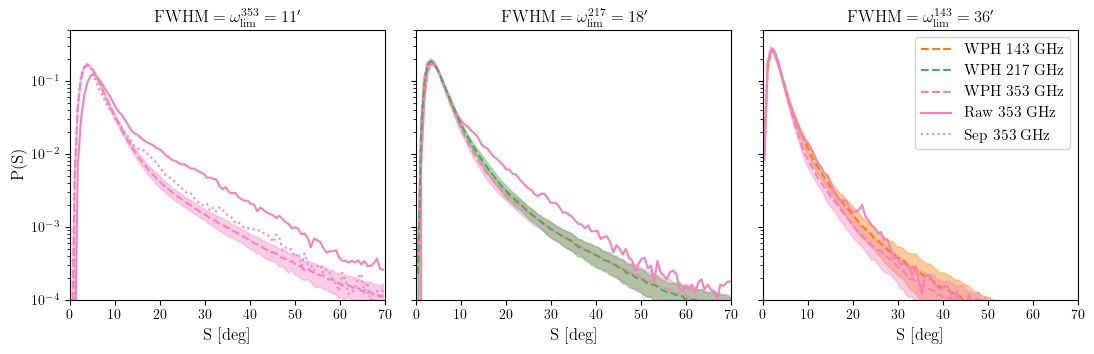

In [23]:
font = 12
ymin = 1e-4
ymax = 5*1e-1

fig, ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(12,3))

# 353 
#ax[0].plot(bin_centers,hist_mock_S_353_353,color='black',ls='dotted')
ax[0].plot(bin_centers,hist_sep_S_353_353,color=color[3],ls='dotted')
ax[0].plot(bin_centers,hist_raw_S_353_353,color=color[3],ls='-')
ax[0].plot(bin_centers,mean_hist_S_353_353,color=color[3],ls='--')
ax[0].fill_between(bin_centers,mean_hist_S_353_353-std_hist_S_353_353,mean_hist_S_353_353+std_hist_S_353_353,color=color[3],alpha=0.4)

ax[0].set_title(r'$\rm{FWHM = \omega_{lim}^{353} = 11^\prime}$',loc='center',fontsize=font,pad=5)
ax[0].set_yscale('log')
ax[0].set_ylim(ymin,ymax)
ax[0].set_xlim(0,70)
ax[0].set_ylabel(r'$\rm{P(S)}$',fontsize=font)
ax[0].set_xlabel(r'$\rm{S \ [deg]}$',fontsize=font)
ax[0].set_xticks(ticks=[0,10,20,30,40,50,60,70])
ax[0].set_xticks(ticks=[],labels=[],minor=True)

# 217 
ax[1].plot(bin_centers,hist_raw_S_353_217,color=color[3],ls='-')
ax[1].plot(bin_centers,mean_hist_S_353_217,color=color[3],ls='--')
ax[1].fill_between(bin_centers,mean_hist_S_353_217-std_hist_S_353_217,mean_hist_S_353_217+std_hist_S_353_217,color=color[3],alpha=0.4)
ax[1].plot(bin_centers,mean_hist_S_217_217,color=color[2],ls='--')
ax[1].fill_between(bin_centers,mean_hist_S_217_217-std_hist_S_217_217,mean_hist_S_217_217+std_hist_S_217_217,color=color[2],alpha=0.4)

ax[1].set_title(r'$\rm{FWHM = \omega_{lim}^{217} = 18^\prime}$',loc='center',fontsize=font,pad=5)
ax[1].set_yscale('log')
ax[1].set_ylim(ymin,ymax)
ax[1].set_xlabel(r'$\rm{S \ [deg]}$',fontsize=font)

# 143 
ax[2].plot(bin_centers,mean_hist_S_143_143,color=color[1],ls='--',label=r'$\rm{WPH \ 143 \ GHz}$')
ax[2].fill_between(bin_centers,mean_hist_S_143_143-std_hist_S_143_143,mean_hist_S_143_143+std_hist_S_143_143,color=color[1],alpha=0.4)

ax[2].plot(bin_centers,mean_hist_S_217_217*np.nan,color=color[2],ls='--',label=r'$\rm{WPH \ 217 \ GHz}$')

ax[2].plot(bin_centers,mean_hist_S_353_143,color=color[3],ls='--',label=r'$\rm{WPH \ 353 \ GHz}$')
ax[2].fill_between(bin_centers,mean_hist_S_353_143-std_hist_S_353_143,mean_hist_S_353_143+std_hist_S_353_143,color=color[3],alpha=0.4)

ax[2].plot(bin_centers,hist_raw_S_353_143,color=color[3],ls='-',label=r'$\rm{Raw \ 353 \ GHz}$')
ax[2].plot(bin_centers,hist_sep_S_353_353*np.nan,color=color[3],ls='dotted',label=r'$\rm{Sep \ 353 \ GHz}$')

ax[2].set_title(r'$\rm{FWHM = \omega_{lim}^{143} = 36^\prime}$',loc='center',fontsize=font,pad=5)
ax[2].set_yscale('log')
ax[2].set_ylim(ymin,ymax)
ax[2].set_xlabel(r'$\rm{S \ [deg]}$',fontsize=font)
ax[2].legend(fontsize=font-1)

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.1,hspace=0.15)

#plt.savefig('Fig7_S_hist_B.pdf',bbox_inches='tight')

In [25]:
n_syn = 50
bins = 100
range_bins = (0,0.5)
density = True
font = 15
fwhms = [11,18,36]

def compute_p_fwhm(I,Q,U,fwhm):
    return np.sqrt(beam(Q,fwhm)**2+beam(U,fwhm)**2)/beam(I,fwhm)
    
# At 353 GHz scale
fwhm = fwhms[0]
    # Raw data 353
#hist_mock_p_353_353, _ = np.histogram(compute_p_fwhm(I_353,mock_Q_353,mock_U_353,fwhm).flatten(),bins=bins,range=range_bins,density=density)
hist_sep_p_353_353, _ = np.histogram(compute_p_fwhm(I_353,Q_353,U_353,fwhm).flatten(),bins=bins,range=range_bins,density=density)
hist_raw_p_353_353, bin_edges = np.histogram(compute_p_fwhm(I_353,Q_353_raw,U_353_raw,fwhm).flatten(),bins=bins,range=range_bins,density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    # WPH 353
hists_p_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_p_353[i], _ = np.histogram(compute_p_fwhm(I_353,QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_p_353_353 = np.mean(hists_p_353,axis=0)
std_hist_p_353_353 = np.std(hists_p_353,axis=0)

# At 217 GHz scale
fwhm = fwhms[1]
hist_raw_p_353_217, bin_edges = np.histogram(compute_p_fwhm(I_353,Q_353_raw,U_353_raw,fwhm).flatten(),bins=bins,range=range_bins,density=density)
    # WPH 353
hists_p_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_p_353[i], _ = np.histogram(compute_p_fwhm(I_353,QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_p_353_217 = np.mean(hists_p_353,axis=0)
std_hist_p_353_217 = np.std(hists_p_353,axis=0)
    # WPH 217
hists_p_217 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_p_217[i], _ = np.histogram(compute_p_fwhm(I_353,QU_syn_217[i+1,0],QU_syn_217[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_p_217_217 = np.mean(hists_p_217,axis=0)
std_hist_p_217_217 = np.std(hists_p_217,axis=0)

# At 143 GHz scale
fwhm = fwhms[2]
hist_raw_p_353_143, bin_edges = np.histogram(compute_p_fwhm(I_353,Q_353_raw,U_353_raw,fwhm).flatten(),bins=bins,range=range_bins,density=density)
    # WPH 353
hists_p_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_p_353[i], _ = np.histogram(compute_p_fwhm(I_353,QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_p_353_143 = np.mean(hists_p_353,axis=0)
std_hist_p_353_143 = np.std(hists_p_353,axis=0)
    # WPH 143
hists_p_143 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_p_143[i], _ = np.histogram(compute_p_fwhm(I_353,QU_syn_143[i+1,0],QU_syn_143[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_p_143_143 = np.mean(hists_p_143,axis=0)
std_hist_p_143_143 = np.std(hists_p_143,axis=0)

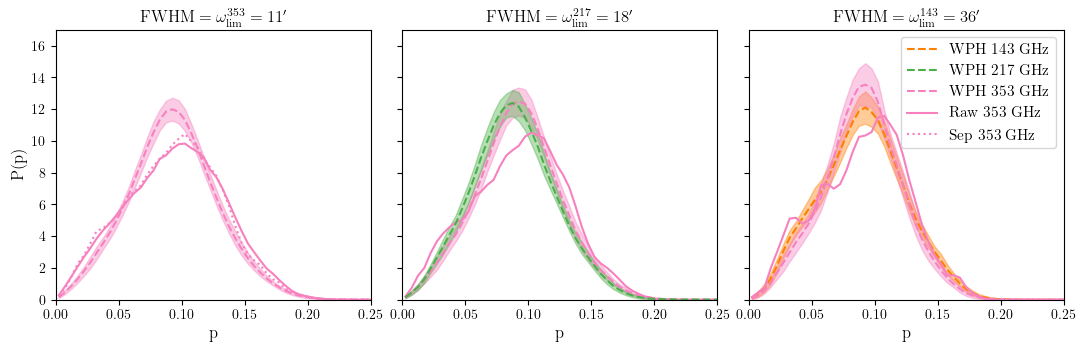

In [27]:
font = 12
ymin = 0
ymax = 17

fig, ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(12,3))

# 353 
ax[0].plot(bin_centers,hist_raw_p_353_353,color=color[3],ls='-')
#ax[0].plot(bin_centers,hist_mock_p_353_353,color='black',ls='-')
ax[0].plot(bin_centers,hist_sep_p_353_353,color=color[3],ls='dotted')
ax[0].plot(bin_centers,mean_hist_p_353_353,color=color[3],ls='--')
ax[0].fill_between(bin_centers,mean_hist_p_353_353-std_hist_p_353_353,mean_hist_p_353_353+std_hist_p_353_353,color=color[3],alpha=0.4)

ax[0].set_title(r'$\rm{FWHM = \omega_{lim}^{353} = 11^\prime}$',loc='center',fontsize=font,pad=5)
#ax[0].set_yscale('log')
ax[0].set_ylim(ymin,ymax)
ax[0].set_xlim(0,0.25)
ax[0].set_ylabel(r'$\rm{P(p)}$',fontsize=font)
ax[0].set_xlabel(r'$\rm{p}$',fontsize=font)

# 217 
ax[1].plot(bin_centers,hist_raw_p_353_217,color=color[3],ls='-')
ax[1].plot(bin_centers,mean_hist_p_353_217,color=color[3],ls='--')
ax[1].fill_between(bin_centers,mean_hist_p_353_217-std_hist_p_353_217,mean_hist_p_353_217+std_hist_p_353_217,color=color[3],alpha=0.4)
ax[1].plot(bin_centers,mean_hist_p_217_217,color=color[2],ls='--')
ax[1].fill_between(bin_centers,mean_hist_p_217_217-std_hist_p_217_217,mean_hist_p_217_217+std_hist_p_217_217,color=color[2],alpha=0.4)

ax[1].set_title(r'$\rm{FWHM = \omega_{lim}^{217} = 18^\prime}$',loc='center',fontsize=font,pad=5)
#ax[1].set_yscale('log')
ax[1].set_ylim(ymin,ymax)
ax[1].set_xlabel(r'$\rm{p}$',fontsize=font)

# 143 
ax[2].plot(bin_centers,mean_hist_p_143_143,color=color[1],ls='--',label=r'$\rm{WPH \ 143 \ GHz}$')
ax[2].fill_between(bin_centers,mean_hist_p_143_143-std_hist_p_143_143,mean_hist_p_143_143+std_hist_p_143_143,color=color[1],alpha=0.4)

ax[2].plot(bin_centers,mean_hist_p_217_217*np.nan,color=color[2],ls='--',label=r'$\rm{WPH \ 217 \ GHz}$')

ax[2].plot(bin_centers,mean_hist_p_353_143,color=color[3],ls='--',label=r'$\rm{WPH \ 353 \ GHz}$')
ax[2].fill_between(bin_centers,mean_hist_p_353_143-std_hist_p_353_143,mean_hist_p_353_143+std_hist_p_353_143,color=color[3],alpha=0.4)

ax[2].plot(bin_centers,hist_raw_p_353_143,color=color[3],ls='-',label=r'$\rm{Raw \ 353 \ GHz}$')
ax[2].plot(bin_centers,hist_sep_p_353_353*np.nan,color=color[3],ls='dotted',label=r'$\rm{Sep \ 353 \ GHz}$')

ax[2].set_title(r'$\rm{FWHM = \omega_{lim}^{143} = 36^\prime}$',loc='center',fontsize=font,pad=5)
#ax[2].set_yscale('log')
ax[2].set_ylim(ymin,ymax)
ax[2].set_xlabel(r'$\rm{p}$',fontsize=font)
ax[2].legend(fontsize=font-1)

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.1,hspace=0.15)

#plt.savefig('Fig8_p_hist_B.pdf',bbox_inches='tight')

In [28]:
n_syn = 50
bins = 100
range_bins = (-60,60)
density = True
font = 15
fwhms = [11,18,36]

def compute_psi_deg(Q,U,fwhm):
    return 0.5*np.arctan2(-beam(U,fwhm),beam(Q,fwhm))/np.pi*180

# At 353 GHz scale
fwhm = fwhms[0]
    # Raw data 353
#hist_mock_psi_353_353, bin_edges = np.histogram(compute_psi_deg(mock_Q_353,mock_U_353,fwhm).flatten(),bins=bins,range=range_bins,density=density)
hist_sep_psi_353_353, bin_edges = np.histogram(compute_psi_deg(Q_353,U_353,fwhm).flatten(),bins=bins,range=range_bins,density=density)
hist_raw_psi_353_353, bin_edges = np.histogram(compute_psi_deg(Q_353_raw,U_353_raw,fwhm).flatten(),bins=bins,range=range_bins,density=density)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    # WPH 353
hists_psi_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_psi_353[i], _ = np.histogram(compute_psi_deg(QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_psi_353_353 = np.mean(hists_psi_353,axis=0)
std_hist_psi_353_353 = np.std(hists_psi_353,axis=0)

# At 217 GHz scale
fwhm = fwhms[1]
hist_raw_psi_353_217, bin_edges = np.histogram(compute_psi_deg(Q_353_raw,U_353_raw,fwhm).flatten(),bins=bins,range=range_bins,density=density)
    # WPH 353
hists_psi_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_psi_353[i], _ = np.histogram(compute_psi_deg(QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_psi_353_217 = np.mean(hists_psi_353,axis=0)
std_hist_psi_353_217 = np.std(hists_psi_353,axis=0)
    # WPH 217
hists_psi_217 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_psi_217[i], _ = np.histogram(compute_psi_deg(QU_syn_217[i+1,0],QU_syn_217[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_psi_217_217 = np.mean(hists_psi_217,axis=0)
std_hist_psi_217_217 = np.std(hists_psi_217,axis=0)

# At 143 GHz scale
fwhm = fwhms[2]
hist_raw_psi_353_143, bin_edges = np.histogram(compute_psi_deg(Q_353_raw,U_353_raw,fwhm).flatten(),bins=bins,range=range_bins,density=density)
    # WPH 353
hists_psi_353 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_psi_353[i], _ = np.histogram(compute_psi_deg(QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_psi_353_143 = np.mean(hists_psi_353,axis=0)
std_hist_psi_353_143 = np.std(hists_psi_353,axis=0)
    # WPH 143
hists_psi_143 = np.zeros((n_syn,bins))
for i in range(n_syn):
    hists_psi_143[i], _ = np.histogram(compute_psi_deg(QU_syn_143[i+1,0],QU_syn_143[i+1,1],fwhm).flatten(),bins=bins,range=range_bins,density=density)
mean_hist_psi_143_143 = np.mean(hists_psi_143,axis=0)
std_hist_psi_143_143 = np.std(hists_psi_143,axis=0)

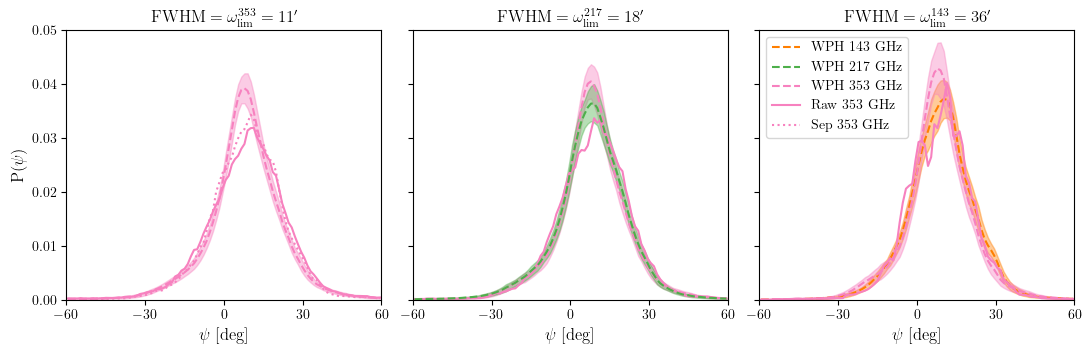

In [30]:
font = 12
ymin = 0
ymax = 0.05

fig, ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(12,3))

# 353 
ax[0].plot(bin_centers,hist_raw_psi_353_353,color=color[3],ls='-')
#ax[0].plot(bin_centers,hist_mock_psi_353_353,color='black',ls='-')
ax[0].plot(bin_centers,hist_sep_psi_353_353,color=color[3],ls='dotted')
ax[0].plot(bin_centers,mean_hist_psi_353_353,color=color[3],ls='--')
ax[0].fill_between(bin_centers,mean_hist_psi_353_353-std_hist_psi_353_353,mean_hist_psi_353_353+std_hist_psi_353_353,color=color[3],alpha=0.4)

ax[0].set_title(r'$\rm{FWHM = \omega_{lim}^{353} = 11^\prime}$',loc='center',fontsize=font,pad=5)
#ax[0].set_yscale('log')
ax[0].set_ylim(ymin,ymax)
ax[0].set_xlim(-60,60)
ax[0].set_ylabel(r'$\rm{P(\psi)}$',fontsize=font)
ax[0].set_xlabel(r'$\rm{\psi \ [deg]}$',fontsize=font)
ax[0].set_xticks(ticks=[-60,-30,0,30,60])
ax[0].set_xticks(ticks=[],labels=[],minor=True)

# 217 
ax[1].plot(bin_centers,hist_raw_psi_353_217,color=color[3],ls='-')
ax[1].plot(bin_centers,mean_hist_psi_353_217,color=color[3],ls='--')
ax[1].fill_between(bin_centers,mean_hist_psi_353_217-std_hist_psi_353_217,mean_hist_psi_353_217+std_hist_psi_353_217,color=color[3],alpha=0.4)
ax[1].plot(bin_centers,mean_hist_psi_217_217,color=color[2],ls='--')
ax[1].fill_between(bin_centers,mean_hist_psi_217_217-std_hist_psi_217_217,mean_hist_psi_217_217+std_hist_psi_217_217,color=color[2],alpha=0.4)

ax[1].set_title(r'$\rm{FWHM = \omega_{lim}^{217} = 18^\prime}$',loc='center',fontsize=font,pad=5)
#ax[1].set_yscale('log')
ax[1].set_ylim(ymin,ymax)
ax[1].set_xlabel(r'$\rm{\psi \ [deg]}$',fontsize=font)

# 143 
ax[2].plot(bin_centers,mean_hist_psi_143_143,color=color[1],ls='--',label=r'$\rm{WPH \ 143 \ GHz}$')
ax[2].fill_between(bin_centers,mean_hist_psi_143_143-std_hist_psi_143_143,mean_hist_psi_143_143+std_hist_psi_143_143,color=color[1],alpha=0.4)

ax[2].plot(bin_centers,mean_hist_psi_217_217*np.nan,color=color[2],ls='--',label=r'$\rm{WPH \ 217 \ GHz}$')

ax[2].plot(bin_centers,mean_hist_psi_353_143,color=color[3],ls='--',label=r'$\rm{WPH \ 353 \ GHz}$')
ax[2].fill_between(bin_centers,mean_hist_psi_353_143-std_hist_psi_353_143,mean_hist_psi_353_143+std_hist_psi_353_143,color=color[3],alpha=0.4)

ax[2].plot(bin_centers,hist_raw_psi_353_143,color=color[3],ls='-',label=r'$\rm{Raw \ 353 \ GHz}$')
ax[2].plot(bin_centers,hist_sep_psi_353_353*np.nan,color=color[3],ls='dotted',label=r'$\rm{Sep \ 353 \ GHz}$')

ax[2].set_title(r'$\rm{FWHM = \omega_{lim}^{143} = 36^\prime}$',loc='center',fontsize=font,pad=5)
#ax[2].set_yscale('log')
ax[2].set_ylim(ymin,ymax)
ax[2].set_xlabel(r'$\rm{\psi \ [deg]}$',fontsize=font)
ax[2].legend(fontsize=font-2)

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.1,hspace=0.15)

#plt.savefig('Fig6_psi_hist_B.pdf',bbox_inches='tight')

## Fig. 11 : HOG

In [31]:
sys.path.append('/home/auclair/Thèse_LPENS/Informatique/Packages/magnetar-master')
from hro import *

In [32]:
def V(mode,I,Q,U,fwhm,reso,steps,mask=None):
    logI = np.log10(I)
    sz=np.shape(logI)
    ksz=fwhm/2.355
    pxksz=ksz/reso
    #dIdx=ndimage.filters.gaussian_filter(np.log10(I), [fwhm/2.355, fwhm/2.355], order=[0,1], mode='nearest')
    #dIdy=ndimage.filters.gaussian_filter(np.log10(I), [fwhm/2.355, fwhm/2.355], order=[1,0], mode='nearest')
    #normgrad=np.sqrt(dIdx**2+dIdy**2)
    weights= np.ones(sz)*(reso/ksz)**2 #np.maximum(NHI-beam(NHI,60),0) #normgrad #np.ones(sz)*(reso/ksz)**2
    outputhro = hroLITE(logI, beam(Q,fwhm), beam(-U,fwhm), steps=steps, minI=np.nanmin(logI), w=weights, ksz=pxksz, mask=mask)
    isteps=outputhro['csteps']
    bins = 0.5*(isteps[0:np.size(isteps)-1]+isteps[1:np.size(isteps)])
    if mode == 'cos':
        V = outputhro['Zx']
    if mode == 'sin':
        V = outputhro['Zy']
    return bins, V

def mask_normgrad(I,fwhm,frac):
    dIdx=ndimage.filters.gaussian_filter(np.log10(I), [fwhm/2.355, fwhm/2.355], order=[0,1], mode='nearest')
    dIdy=ndimage.filters.gaussian_filter(np.log10(I), [fwhm/2.355, fwhm/2.355], order=[1,0], mode='nearest')
    normgrad=np.sqrt(dIdx**2+dIdy**2)
    thresh = (normgrad.flatten())[np.argsort(normgrad.flatten())][int((1-frac)*len(I.flatten()))]
    return normgrad > thresh

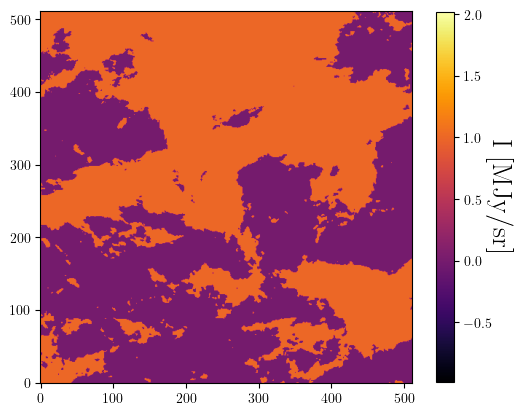

In [33]:
NHI = np.load('/home/auclair/Thèse_LPENS/Informatique/Data/TE correlation/Column_density/N_HI.npy')[128:-128,128:-128].astype(np.float64)
#Van_I = np.load('/home/auclair/Thèse_LPENS/Informatique/Data/TE correlation/Vansyngel/Vansyngel_I_768px.npy')[128:-128,128:-128].astype(np.float64)
#Van_Q = np.load('/home/auclair/Thèse_LPENS/Informatique/Data/TE correlation/Vansyngel/Vansyngel_Q_768px.npy')[128:-128,128:-128].astype(np.float64)
#Van_U = np.load('/home/auclair/Thèse_LPENS/Informatique/Data/TE correlation/Vansyngel/Vansyngel_U_768px.npy')[128:-128,128:-128].astype(np.float64)
mask=np.ones_like(NHI)
mask[(np.log10(NHI) < 21)]=0.
plot(mask)

In [34]:
mode = 'cos'
steps = 50
n_syn = 10
fwhms = [11,18,36]

In [35]:
fwhm = fwhms[0]

ax_NHI, V_raw_353_353 = V(mode,NHI,Q_353_raw,U_353_raw,fwhm,2.35,steps,mask=mask)
ax_NHI, V_sep_353_353 = V(mode,NHI,Q_353,U_353,fwhm,2.35,steps,mask=mask)
V_Van_353 = V(mode,NHI,Van_Q,Van_U,fwhm,2.35,steps,mask=mask)[1]

V_syn_353_353 = np.zeros((n_syn,steps))
for i in range(n_syn):
    V_syn_353_353[i] = V(mode,NHI,QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm,2.35,steps,mask=mask)[1]
mean_V_syn_353_353 = np.mean(V_syn_353_353,axis=0)
std_V_syn_353_353 = np.std(V_syn_353_353,axis=0)

fwhm = fwhms[1]

ax_NHI, V_raw_353_217 = V(mode,NHI,Q_353_raw,U_353_raw,fwhm,2.35,steps,mask=mask)
V_Van_217 = V(mode,NHI,Van_Q,Van_U,fwhm,2.35,steps,mask=mask)[1]

V_syn_353_217 = np.zeros((n_syn,steps))
V_syn_217_217 = np.zeros((n_syn,steps))
for i in range(n_syn):
    V_syn_353_217[i] = V(mode,NHI,QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm,2.35,steps,mask=mask)[1]
    V_syn_217_217[i] = V(mode,NHI,QU_syn_217[i+1,0],QU_syn_217[i+1,1],fwhm,2.35,steps,mask=mask)[1]
mean_V_syn_353_217 = np.mean(V_syn_353_217,axis=0)
mean_V_syn_217_217 = np.mean(V_syn_217_217,axis=0)
std_V_syn_353_217 = np.std(V_syn_353_217,axis=0)
std_V_syn_217_217 = np.std(V_syn_217_217,axis=0)

fwhm = fwhms[2]

ax_NHI, V_raw_353_143 = V(mode,NHI,Q_353_raw,U_353_raw,fwhm,2.35,steps,mask=mask)
V_Van_143 = V(mode,NHI,Van_Q,Van_U,fwhm,2.35,steps,mask=mask)[1]

V_syn_353_143 = np.zeros((n_syn,steps))
V_syn_143_143 = np.zeros((n_syn,steps))
for i in range(n_syn):
    V_syn_353_143[i] = V(mode,NHI,QU_syn_353[i+1,0],QU_syn_353[i+1,1],fwhm,2.35,steps,mask=mask)[1]
    V_syn_143_143[i] = V(mode,NHI,QU_syn_143[i+1,0],QU_syn_143[i+1,1],fwhm,2.35,steps,mask=mask)[1]
mean_V_syn_353_143 = np.mean(V_syn_353_143,axis=0)
mean_V_syn_143_143 = np.mean(V_syn_143_143,axis=0)
std_V_syn_353_143 = np.std(V_syn_353_143,axis=0)
std_V_syn_143_143 = np.std(V_syn_143_143,axis=0)

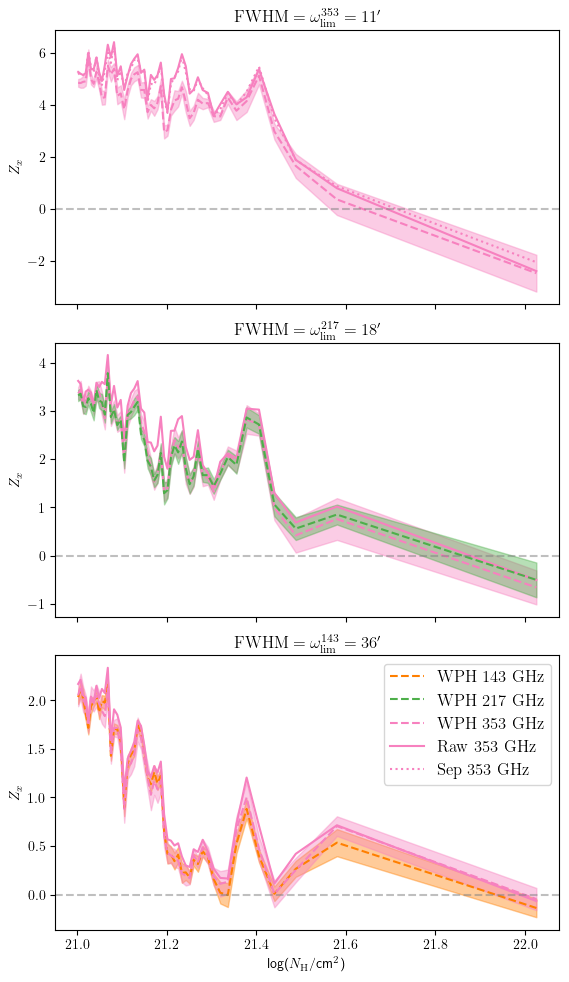

In [37]:
font = 12

fig, ax = plt.subplots(3,1,sharex=True,sharey=False,figsize=(6,10))

ax[0].plot(ax_NHI,V_raw_353_353,color=color[3],ls='-')
ax[0].plot(ax_NHI,V_sep_353_353,color=color[3],ls='dotted')
ax[0].plot(ax_NHI,mean_V_syn_353_353,color=color[3],ls='--')
ax[0].fill_between(ax_NHI,mean_V_syn_353_353-std_V_syn_353_353,mean_V_syn_353_353+std_V_syn_353_353,color=color[3],alpha=0.4)
#ax[0].plot(ax_NHI,V_Van_353,color='black',ls='-')
ax[0].set_ylabel(r'$Z_x$')
ax[0].axhline(y=0, color='grey', alpha=0.5, linestyle='dashed')
ax[0].set_title(r'$\rm{FWHM = \omega_{lim}^{353} = 11^\prime}$',loc='center',fontsize=font,pad=5)

ax[1].plot(ax_NHI,V_raw_353_217,color=color[3],ls='-')
ax[1].plot(ax_NHI,mean_V_syn_353_217,color=color[3],ls='--')
ax[1].fill_between(ax_NHI,mean_V_syn_353_217-std_V_syn_353_217,mean_V_syn_353_217+std_V_syn_353_217,color=color[3],alpha=0.4)
ax[1].plot(ax_NHI,mean_V_syn_217_217,color=color[2],ls='--')
ax[1].fill_between(ax_NHI,mean_V_syn_217_217-std_V_syn_217_217,mean_V_syn_217_217+std_V_syn_217_217,color=color[2],alpha=0.4)
#ax[1].plot(ax_NHI,V_Van_217,color='black',ls='-')
ax[1].set_ylabel(r'$Z_x$')
ax[1].axhline(y=0, color='grey', alpha=0.5, linestyle='dashed')
ax[1].set_title(r'$\rm{FWHM = \omega_{lim}^{217} = 18^\prime}$',loc='center',fontsize=font,pad=5)


ax[2].plot(ax_NHI,mean_V_syn_143_143,color=color[1],ls='--',label=r'$\rm{WPH \ 143 \ GHz}$')
ax[2].fill_between(ax_NHI,mean_V_syn_143_143-std_V_syn_143_143,mean_V_syn_143_143+std_V_syn_143_143,color=color[1],alpha=0.4)
ax[2].plot(ax_NHI,mean_V_syn_217_217*np.nan,color=color[2],ls='--',label=r'$\rm{WPH \ 217 \ GHz}$')
ax[2].plot(ax_NHI,mean_V_syn_353_143,color=color[3],ls='--',label=r'$\rm{WPH \ 353 \ GHz}$')
ax[2].fill_between(ax_NHI,mean_V_syn_353_143-std_V_syn_353_143,mean_V_syn_353_143+std_V_syn_353_143,color=color[3],alpha=0.4)
ax[2].plot(ax_NHI,V_raw_353_143,color=color[3],ls='-',label=r'$\rm{Raw \ 353 \ GHz}$')
ax[2].plot(ax_NHI,V_sep_353_353*np.nan,color=color[3],ls='dotted',label=r'$\rm{Sep \ 353 \ GHz}$')
#ax[2].plot(ax_NHI,V_Van_143,color='black',ls='-',label=r'$\rm{Vansyngel}$')
ax[2].set_ylabel(r'$Z_x$')
ax[2].axhline(y=0, color='grey', alpha=0.5, linestyle='dashed')
ax[2].set_xlabel(r'log($N_{\rm H}/$cm$^{2}$)')
ax[2].set_title(r'$\rm{FWHM = \omega_{lim}^{143} = 36^\prime}$',loc='center',fontsize=font,pad=5)
ax[2].legend(fontsize=font)

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.1,hspace=0.14)

#plt.savefig('Fig10_HOG_B.pdf',bbox_inches='tight')

## Pannel of syntheses

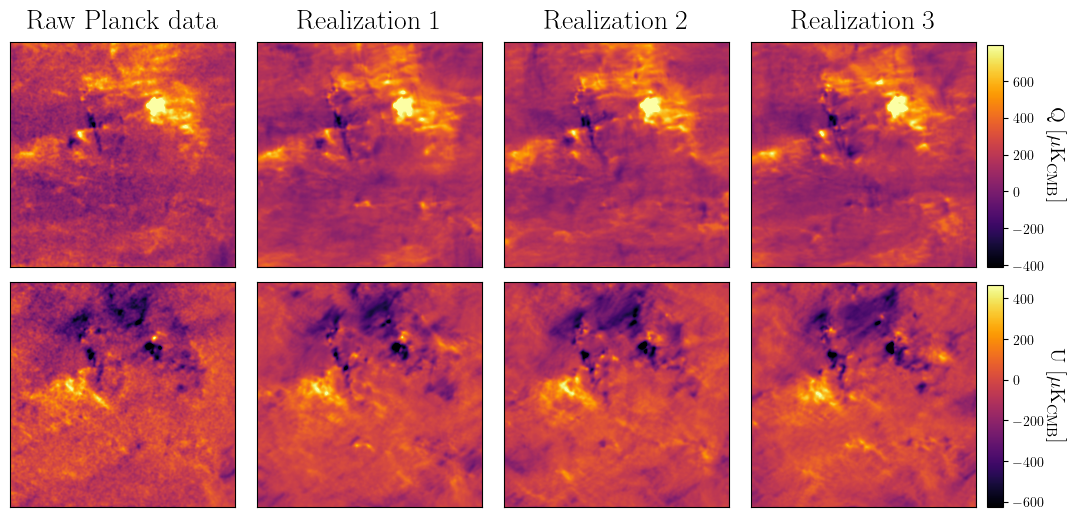

In [17]:
fwhm = 11

fig, ax = plt.subplots(2, 4, figsize=(11.5, 6), sharex=True, sharey=True)

vmin_353_Q = np.mean(QU_syn_353[0,0])-4*np.std(QU_syn_353[0,0])
vmax_353_Q = np.mean(QU_syn_353[0,0])+4*np.std(QU_syn_353[0,0])
vmin_353_U = np.mean(QU_syn_353[0,1])-4*np.std(QU_syn_353[0,1])
vmax_353_U = np.mean(QU_syn_353[0,1])+4*np.std(QU_syn_353[0,1])

A = plot_subplot(0,0,beam(Q_353_raw,fwhm),r'$\rm{Raw \ Planck \ data}$',v=(vmin_353_Q,vmax_353_Q))
B = plot_subplot(1,0,beam(U_353_raw,fwhm),'',v=(vmin_353_U,vmax_353_U))

C = plot_subplot(0,1,beam(QU_syn_353[1,0],fwhm),r'$\rm{Realization \ 1}$',v=(vmin_353_Q,vmax_353_Q))
D = plot_subplot(1,1,beam(QU_syn_353[1,1],fwhm),'',v=(vmin_353_U,vmax_353_U))

E = plot_subplot(0,2,beam(QU_syn_353[2,0],fwhm),r'$\rm{Realization \ 2}$',v=(vmin_353_Q,vmax_353_Q))
F = plot_subplot(1,2,beam(QU_syn_353[2,1],fwhm),'',v=(vmin_353_U,vmax_353_U))

G = plot_subplot(0,3,beam(QU_syn_353[3,0],fwhm),r'$\rm{Realization \ 3}$',v=(vmin_353_Q,vmax_353_Q))
H = plot_subplot(1,3,beam(QU_syn_353[3,1],fwhm),'',v=(vmin_353_U,vmax_353_U))

set_colorbar(G,0,3,label=r'$\rm{Q \ [\mu K_{CMB}]}$')
set_colorbar(H,1,3,label=r'$\rm{U \ [\mu K_{CMB}]}$')

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.1,hspace=-0.2)

#plt.savefig('Fig4_syntheses_pannel.pdf')#,bbox_inches='tight')